<a href="https://colab.research.google.com/github/DamaKubu/Chat-Human/blob/main/Multifraktali%C5%A1kumas_failure_is_sucess_FFBAKIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotekos



In [ ]:
# Install tqdm if it's not already available
!pip install tqdm

# Example of using tqdm
from tqdm import tqdm as wait

#for i in wait(range(5)):
#    time.sleep(0.1)


In [ ]:
#Pips

!pip install MFDFA
!pip install hurst
!pip install fbm
!pip install hurst

In [ ]:
#pagal https://ipython-books.github.io/134-simulating-a-stochastic-differential-equation/
#coocbook
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
## imports

import numpy as np
import matplotlib.pyplot as plt
from functools import partial
import time
from hurst import compute_Hc


from fbm import FBM
import math
from scipy import stats

# Imports
from MFDFA import MFDFA
from MFDFA import fgn
# where this second library is to generate fractional Gaussian noises


from hurst import compute_Hc, random_walk


plt.rcParams["figure.figsize"] = (5,5)
## constants and shit

from ipywidgets import interact, interactive, fixed, interact_manual
from scipy import stats
# Two-sided inverse Students t-distribution
from scipy.stats import t
# plt.figure()
# plt.subplot(311) #subplot(nrows, ncols, index, **kwargs)
# plt.scatter(x, y, s=0.0001)
# plt.subplot(312)
def plotLinearFit(x,y,xlabel='xlabel',ylabel='ylabel',plot=True,s=0.05):
    # p - probability, df - degrees of freedom
    tinv = lambda p, df: abs(t.ppf(p/2, df))
    ts = tinv(0.05, len(x)-2)
    res = stats.linregress(x, y)
    if plot == True:
        Nuokrypis = f"slope (95%): {res.slope:.6f} +/- {ts*res.stderr:.6f} \n intercept (95%): {res.intercept:.6f} +/- {ts*res.intercept_stderr:.6f}\n using Students two-sided t-distribution"
        plt.figure(figsize=(10,5))
        plt.scatter(x,y,s,label='original data')
        plt.plot(x, res.intercept + res.slope*x, 'r', label=Nuokrypis)
        plt.legend()
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()

    return res.slope

# New Section

# Funkcijos

In [ ]:
#@title R/S analysis
def myRS(xx):
    H, c, data = compute_Hc(xx, kind='random_walk', simplified=False)
    return H


In [ ]:
#@title myMSD
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

def myMSD(series, plot = False):
    N = len(series)
    T = min(100, N // 2)  # You can adjust T depending on the series length
    tau_values = np.arange(1, T + 1)
    MSD = np.zeros(T)

    for i, tau in wait(enumerate(tau_values)):
        squared_displacements = (series[tau:] - series[:-tau]) ** 2
        MSD[i] = np.mean(squared_displacements)

    log_tau = np.log(tau_values)
    log_MSD = np.log(MSD)

    slope, intercept, r_value, p_value, std_err = linregress(log_tau, log_MSD)

    if plot:
        # Plotting the MSD curve
        plt.figure(figsize=(4, 3))
        plt.plot(log_tau, log_MSD, 'o', label='Log-Log MSD Data')
        plt.plot(log_tau, intercept + slope * log_tau, 'r', label=f'Fit line (slope = {slope:.2f})')
        plt.xlabel('Log(Tau)')
        plt.ylabel('Log(MSD)')
        plt.title('Log-Log Plot of Mean Squared Displacement')
        plt.legend()
        plt.grid(True)
        plt.show()

    return slope / 2  # Hurst exponent


In [ ]:
#@title MF-HDA

# MF-HDA.py                   C. Carrizales-Velazquez 21 April 2021
#
#
#-------------------------------------------------------------------------------------------
# MF-HDA: Calculate the Multifractal Higuchi Dimension Analysis (MF-HDA) of our paper: "Generalization of Higuchi’s fractal dimension for multifractal analysis of short time series"
#
# This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY
#
#-------------------------------------------------------------------------------------------

# Usage:
#
#  $ python3 MF-HDA.py -5 5 0.25 First_10K_integrated_Ulysses_Book.dat 25 0 15 16 Ulysses
#
# where:
#  ---> -5 is the minimum q-moment of L(q,k)
#  ---> 5 is the maximum q-moment of L(q,k)
#  ---> 0.25 is the separation between q-moments used in the MF-HDA
#  ---> First_10K_integrated_Ulysses_Book.dat is the file to read (this contain the time-series to analyze)
#  ---> 25 is the value initial scale k used in the MF-HDA
#  ---> 0 indicates the maximum scale k used in the MF-HDA (IF IT IS ZERO THEN THIS PROGRAM TAKE N/10, where N=length of time-series)
#  ---> 15 is p_r
#  ---> 16 is the number of bins used in the histogram for the expectation of Delta_X (for more details see section 2.2 of our publication: "Generalization of Higuchi’s fractal dimension for multifractal analysis of short time series")
#  ---> Ulysses is the name of outfiles
#
# these inputs can be changed as you want

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os, sys

# save the inputs
#q_min = float(sys.argv[1]); q_max = float(sys.argv[2]); dq = float(sys.argv[3]); FILE = str(sys.argv[4]); ini = int(sys.argv[5]); fin = int(sys.argv[6]); PerI = int(sys.argv[7]); PerF = 100; Nbins=int(sys.argv[8]); name = str(sys.argv[9]);M=[];Q=np.arange(q_min-dq,q_max+2*dq,dq);NQ=len(Q)
def MF_HDA(x):
    q_min = -5#float(sys.argv[1]);
    q_max = 5#float(sys.argv[2]);
    dq = 0.25#float(sys.argv[3]);
    FILE ='Nofile.txt'#str(sys.argv[4]);
    ini = 25 #int(sys.argv[5]);
    fin = 0 #int(sys.argv[6]);
    PerI = 15#int(sys.argv[7]);
    PerF = 100;
    Nbins= 16 #int(sys.argv[8]);
    name = 'sexy time'#str(sys.argv[9]);
    M=[];
    Q=np.arange(q_min-dq,q_max+2*dq,dq);
    NQ=len(Q)


    ##################################################### create a folder to save the results there
    def createFolder(directory):
        try:
            if not os.path.exists(directory):
                os.makedirs(directory)
        except OSError:
            print ('Error: Creating directory. ' + directory)

    createFolder('MFH_P_'+str(PerI)+'-100_'+name+'_ki'+str(ini)+'_kf'+str(fin)+'_Nbins'+str(Nbins)+'/')
    ####################################################

    for j in range(NQ+1):
        M.append([]) # create the array for L(q,k)

    # reading data
    #data = np.loadtxt(FILE); x = data.transpose()



    N = len(x); k = ini # set the initial scale k

    # define the end of the scale k
    if fin == 0:
        KF=N/10
    else:
        KF=fin

    wbin = 100/Nbins # width of bins are calculated
    while k <= KF:
        M[0].append(k);subN=[];L=[] # M[0] save the scale k

        preDx =[]
        for pm in range(k):
            m = pm + 1
            pDx = abs(np.diff(x[m-1:N:k])); preDx.append(pDx[pDx != 0]) # calculate the Delta_X for each scale k and for each m-value (for more details see section 2.1 of our paper). We also discard vales of Delta_X=0, this will produce incosistencies for negative q-moments

        Dx = np.concatenate(preDx) # we join all the m-subseries of Delta_X
        FI = np.percentile(Dx, PerI); FS = np.percentile(Dx, PerF); Dx = Dx[ Dx >= FI]; Dx = Dx[ Dx <= FS];	bin_edges = [] # we remove data according to p_r
        for i in np.arange(0,100+wbin, wbin):
            bin_edges.append(np.percentile(Dx, i)) # we set the bin_edges in order to get equi-probable bins

        BE = np.array(bin_edges); X=[]
        for i in range(len(BE)-1):
            X.append([]) # we create void-arrays for regrouping Delta_X according to its bin-belonging

        for i in range(len(BE)-1):
            for j in Dx:
                if i == 0: # just first bin should be a close interval
                    if j >= BE[i] and j <= BE[i+1]:
                        X[i].append(j) # we save Delta_X according to each bin-belonging
                else:
                    if j > BE[i] and j <= BE[i+1]:
                        X[i].append(j) # we save Delta_X according to each bin-belonging

        W = (np.diff(BE)); H = np.histogram(Dx, bins = BE, density=True); P = H[0] * W  # calculate the probability of each bin
        for I in range(NQ):
            preL=[]; subNDX=[]
            if Q[I] == 0:
                for i in X:
                    subNDX.append( (np.log(np.array(i))) / len(i)) # we save the q-moments of Delta_X (this line is for q=0)
            else:
                for i in X:
                    subNDX.append( (np.array(i)**Q[I]) / len(i)) # we save the q-moments of Delta_X

            for i,j in zip(subNDX, P):
                for a in i:
                    preL.append(a * j) # calculate elements of expected Delta_X

            L.append(sum(preL)) # calculate the expected Delta_X
        for i in range(NQ):
            if Q[i] == 0:
                M[i+1].append((float(N-1)/k**2) *  np.exp(L[i]) ) # calculate the L(q,k) for q=0
            else:
                M[i+1].append((float(N-1)/k**2) *  L[i]**(1.0/Q[i]) ) # calculate the L(q,k)

        k = int(k*np.sqrt(np.sqrt(2))) + 1 # the increment of scale k is logarithmic (note that k <= fin, where fin is an input (line 34 of original version))

    np.savetxt('MFH_P_'+str(PerI)+'-'+str(PerF)+'_'+name+'_ki'+str(ini)+'_kf'+str(fin)+'_Nbins'+str(Nbins)+'/PF_'+name+'.txt',np.matrix(M).transpose(),fmt='%s') # save the L(q,k) in the folder created

    MHT=[[],[],[]]; MHT[0]=Q # MHT will contain info of hölder and tau function
    for i in range(NQ):
        h = 2 + np.polyfit(np.log10(M[0]),np.log10(M[i+1]),1)[0] # hölder is calculated
        MHT[1].append(h);MHT[2].append(Q[i]*h-1) # hölder and tau function are set in MHT

    np.savetxt('MFH_P_'+str(PerI)+'-'+str(PerF)+'_'+name+'_ki'+str(ini)+'_kf'+str(fin)+'_Nbins'+str(Nbins)+'/h_tau-spectrum_'+name+'.txt',np.matrix(MHT).transpose(),fmt='%s') # hölder and tau are saved in the folder created

    Maf=[[],[]]
    for k in range(1,NQ-1):
        a=( (MHT[2][k+1]-MHT[2][k-1])/(2*dq) ) # calculate alpha
        Maf[0].append(a); Maf[1].append(MHT[0][k]*a-MHT[2][k]) # calculate multifractal spectrum f(alpha)

    np.savetxt('MFH_P_'+str(PerI)+'-'+str(PerF)+'_'+name+'_ki'+str(ini)+'_kf'+str(fin)+'_Nbins'+str(Nbins)+'/MF-spectrum_'+name+'.txt',np.matrix(Maf).transpose(),fmt='%s') # multifractal spectrum is saved in the folder created

    # finally we create the figure of the results as figures 3 and 4 of our paper
    sns.set_style('darkgrid')

    grid = plt.GridSpec(3, 2, wspace=0.3, hspace=0.45)
    plt.figure(figsize=(9.5, 6))

    plt.subplot(grid[0,1])
    plt.plot(MHT[0], MHT[1])
    plt.xlabel('q', fontsize=16, fontstyle='italic')
    plt.ylabel('h(q)', fontsize=16, fontstyle='italic')
    plt.grid(True, which="both")

    plt.subplot(grid[1,1])
    plt.plot(MHT[0], MHT[2])
    plt.xlabel('q', fontsize=16, fontstyle='italic')
    plt.ylabel(r'$\tau$(q)', fontsize=16, fontstyle='italic')
    plt.grid(True, which="both")

    plt.subplot(grid[2,1])
    plt.plot(Maf[0], Maf[1])
    plt.xlabel(r'$\alpha$', fontsize=16, fontstyle='italic')
    plt.ylabel(r'f($\alpha$)', fontsize=16, fontstyle='italic')
    plt.grid(True, which="both")

    plt.subplot(grid[0:, 0])
    for i in range(len(M)-1):
        plt.plot(M[0], M[i+1])
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Scale k', fontsize=18, fontstyle='italic')
    plt.ylabel('Generalized length L(q,k)', fontsize=18, fontstyle='italic')
    plt.grid(True, which="both")

    plt.suptitle(r'MF-HDA of '+name+' with $p_r=$'+str(PerI)+'', fontsize=20, style='italic') # title is created with the name of the inputs

    plt.savefig('MFH_P_'+str(PerI)+'-'+str(PerF)+'_'+name+'_ki'+str(ini)+'_kf'+str(fin)+'_Nbins'+str(Nbins)+'/'+name+'.jpg') # save figure
    plt.show() # also this figure is shown

In [ ]:
#@title MF_HDA_for one graph

# save the inputs
#q_min = float(sys.argv[1]); q_max = float(sys.argv[2]); dq = float(sys.argv[3]); FILE = str(sys.argv[4]); ini = int(sys.argv[5]); fin = int(sys.argv[6]); PerI = int(sys.argv[7]); PerF = 100; Nbins=int(sys.argv[8]); name = str(sys.argv[9]);M=[];Q=np.arange(q_min-dq,q_max+2*dq,dq);NQ=len(Q)
def MF_HDA_one_graph(x):
    q_min = -10#float(sys.argv[1]);
    q_max = 10#float(sys.argv[2]);
    dq = 1#float(sys.argv[3]);
    FILE ='Nofile.txt'#str(sys.argv[4]);
    ini = 25 #int(sys.argv[5]);
    fin = 0 #int(sys.argv[6]);
    PerI = 15#int(sys.argv[7]);
    PerF = 100;
    Nbins= 16 #int(sys.argv[8]);
    name = 'sexy time'#str(sys.argv[9]);
    M=[];
    Q=np.arange(q_min-dq,q_max+2*dq,dq);
    NQ=len(Q)


    ##################################################### create a folder to save the results there
    def createFolder(directory):
        try:
            if not os.path.exists(directory):
                os.makedirs(directory)
        except OSError:
            print ('Error: Creating directory. ' + directory)

    createFolder('MFH_P_'+str(PerI)+'-100_'+name+'_ki'+str(ini)+'_kf'+str(fin)+'_Nbins'+str(Nbins)+'/')
    ####################################################

    for j in range(NQ+1):
        M.append([]) # create the array for L(q,k)

    # reading data
    #data = np.loadtxt(FILE); x = data.transpose()



    N = len(x); k = ini # set the initial scale k

    # define the end of the scale k
    if fin == 0:
        KF=N/10
    else:
        KF=fin

    wbin = 100/Nbins # width of bins are calculated
    while k <= KF:
        M[0].append(k);subN=[];L=[] # M[0] save the scale k

        preDx =[]
        for pm in range(k):
            m = pm + 1
            pDx = abs(np.diff(x[m-1:N:k])); preDx.append(pDx[pDx != 0]) # calculate the Delta_X for each scale k and for each m-value (for more details see section 2.1 of our paper). We also discard vales of Delta_X=0, this will produce incosistencies for negative q-moments

        Dx = np.concatenate(preDx) # we join all the m-subseries of Delta_X
        FI = np.percentile(Dx, PerI); FS = np.percentile(Dx, PerF); Dx = Dx[ Dx >= FI]; Dx = Dx[ Dx <= FS];	bin_edges = [] # we remove data according to p_r
        for i in np.arange(0,100+wbin, wbin):
            bin_edges.append(np.percentile(Dx, i)) # we set the bin_edges in order to get equi-probable bins

        BE = np.array(bin_edges); X=[]
        for i in range(len(BE)-1):
            X.append([]) # we create void-arrays for regrouping Delta_X according to its bin-belonging

        for i in range(len(BE)-1):
            for j in Dx:
                if i == 0: # just first bin should be a close interval
                    if j >= BE[i] and j <= BE[i+1]:
                        X[i].append(j) # we save Delta_X according to each bin-belonging
                else:
                    if j > BE[i] and j <= BE[i+1]:
                        X[i].append(j) # we save Delta_X according to each bin-belonging

        W = (np.diff(BE)); H = np.histogram(Dx, bins = BE, density=True); P = H[0] * W  # calculate the probability of each bin
        for I in range(NQ):
            preL=[]; subNDX=[]
            if Q[I] == 0:
                for i in X:
                    subNDX.append( (np.log(np.array(i))) / len(i)) # we save the q-moments of Delta_X (this line is for q=0)
            else:
                for i in X:
                    subNDX.append( (np.array(i)**Q[I]) / len(i)) # we save the q-moments of Delta_X

            for i,j in zip(subNDX, P):
                for a in i:
                    preL.append(a * j) # calculate elements of expected Delta_X

            L.append(sum(preL)) # calculate the expected Delta_X
        for i in range(NQ):
            if Q[i] == 0:
                M[i+1].append((float(N-1)/k**2) *  np.exp(L[i]) ) # calculate the L(q,k) for q=0
            else:
                M[i+1].append((float(N-1)/k**2) *  L[i]**(1.0/Q[i]) ) # calculate the L(q,k)

        k = int(k*np.sqrt(np.sqrt(2))) + 1 # the increment of scale k is logarithmic (note that k <= fin, where fin is an input (line 34 of original version))

    np.savetxt('MFH_P_'+str(PerI)+'-'+str(PerF)+'_'+name+'_ki'+str(ini)+'_kf'+str(fin)+'_Nbins'+str(Nbins)+'/PF_'+name+'.txt',np.matrix(M).transpose(),fmt='%s') # save the L(q,k) in the folder created

    MHT=[[],[],[]]; MHT[0]=Q # MHT will contain info of hölder and tau function
    for i in range(NQ):
        h = 2 + np.polyfit(np.log10(M[0]),np.log10(M[i+1]),1)[0] # hölder is calculated
        MHT[1].append(h);MHT[2].append(Q[i]*h-1) # hölder and tau function are set in MHT

    np.savetxt('MFH_P_'+str(PerI)+'-'+str(PerF)+'_'+name+'_ki'+str(ini)+'_kf'+str(fin)+'_Nbins'+str(Nbins)+'/h_tau-spectrum_'+name+'.txt',np.matrix(MHT).transpose(),fmt='%s') # hölder and tau are saved in the folder created

    Maf=[[],[]]
    for k in range(1,NQ-1):
        a=( (MHT[2][k+1]-MHT[2][k-1])/(2*dq) ) # calculate alpha
        Maf[0].append(a); Maf[1].append(MHT[0][k]*a-MHT[2][k]) # calculate multifractal spectrum f(alpha)

    np.savetxt('MFH_P_'+str(PerI)+'-'+str(PerF)+'_'+name+'_ki'+str(ini)+'_kf'+str(fin)+'_Nbins'+str(Nbins)+'/MF-spectrum_'+name+'.txt',np.matrix(Maf).transpose(),fmt='%s') # multifractal spectrum is saved in the folder created

    # finally we create the figure of the results as figures 3 and 4 of our paper
    sns.set_style('darkgrid')

    #grid = plt.GridSpec(3, 2, wspace=0.3, hspace=0.45)
    #plt.figure(figsize=(9.5, 6))

   #plt.subplot(grid[0,1])
    #plt.plot(MHT[0], MHT[1])
    #plt.xlabel('q', fontsize=16, fontstyle='italic')
    #plt.ylabel('h(q)', fontsize=16, fontstyle='italic')
    #plt.grid(True, which="both")

    return MHT[0], MHT[1]

In [ ]:
from hurst import compute_Hc, random_walk #gal galiu tsg compute_HC naudot?


plt.rcParams["figure.figsize"] = (5,5)
## constants and shit

from ipywidgets import interact, interactive, fixed, interact_manual
from scipy import stats
# Two-sided inverse Students t-distribution
from scipy.stats import t
# plt.figure()
# plt.subplot(311) #subplot(nrows, ncols, index, **kwargs)
# plt.scatter(x, y, s=0.0001)
# plt.subplot(312)
def plotLinearFit(x,y,xlabel='xlabel',ylabel='ylabel',plot=True,s=0.05):
    # p - probability, df - degrees of freedom
    tinv = lambda p, df: abs(t.ppf(p/2, df))
    ts = tinv(0.05, len(x)-2)
    res = stats.linregress(x, y)
    if plot == True:
        Nuokrypis = f"slope (95%): {res.slope:.6f} +/- {ts*res.stderr:.6f} \n intercept (95%): {res.intercept:.6f} +/- {ts*res.intercept_stderr:.6f}\n using Students two-sided t-distribution"
        plt.figure(figsize=(10,5))
        plt.scatter(x,y,s,label='original data')
        plt.plot(x, res.intercept + res.slope*x, 'r', label=Nuokrypis)
        plt.legend()
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()

    return res.slope

In [ ]:
 #@title Higuchi

 def higuchi1(a, k_max = 10):
        L = []
        x = []
        N = len(a)

        for k in wait(range(1,k_max)):
            Lk = 0
            for m in range(0,k):
                #we pregenerate all idxs
                idxs = np.arange(1,int(np.floor((N-m)/k)),dtype=np.int32)
                Lmk = np.sum(np.abs(a[m+idxs*k] - a[m+k*(idxs-1)]))
                Lmk = (Lmk*(N - 1)/(((N - m)/ k)* k)) / k
                Lk += Lmk

            L.append(np.log(Lk/(m+1)))
            x.append([np.log(1.0/ k), 1])

        (p, r1, r2, s)=np.linalg.lstsq(x, L,rcond=-1)
        return p[0]


In [ ]:
#
def skirstinys(xx, e1, e2, N=100, k = 0.1, x_pradinis = 0, TT = 10000, bins = 40 ):

    fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(7, 4))

    epsilonai = f"$\\epsilon_1 = ${e1:2.2f},   $\\epsilon_2 = ${e2:2.2f}"
    parametrai = f"\n N = {N}, $x_0$ = {x_pradinis}, iteracijos = {TT}"



    #xx
    ax[0].set_title(f"Gautas tikimybės skirstinys: "+epsilonai+parametrai)
    counts, bins = np.histogram(xx, bins = bins )
    ax[0].stairs(counts, bins)
    ax[0].set_xlabel("x")
    ax[0].set_ylabel("kiekis");

    #teorinis gamma
    C = 1/sc.beta(e1, e2)#m.gamma(e1+e2)/(m.gamma(e2)*m.gamma(e1))
    bb = np.linspace(0,1,100)

    ax[1].set_title(f"Teorinis tikimybės skirstinys:\n "+epsilonai)
    ax[1].plot(bb,C*bb**(e1-1)*(1-bb)**(e2-1));
    ax[1].set_xlabel("$\\frac{X}{N}$")
    ax[1].set_ylabel("P($\\frac{X}{N}$)");





def plot_normhist(xx, bins = 30, ax = 0, ribos = 'auto',*args, **kwargs):

    # Apskaičiuojame histogramą ir bin ribas
    hist, bin_edges = np.histogram(xx, bins=bins, density=True)

    # Skaičiuojame plotą po kreive, kad užtikrintume normalizavimą
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    hist_area = np.sum((bin_edges[1:] - bin_edges[:-1]) * hist)

    if ax == 0:
        fig, ax = plt.subplots(1,1, figsize = (4,3))

    ax.bar(bin_centers, hist, width=(bin_edges[1] - bin_edges[0]), alpha=0.8, color='#117711',*args, **kwargs)
    ax.set_xlabel('xx')
    ax.set_ylabel('PDF')


#naujas plotinimo protokolas
#do_something() ABT: Action but something Therefore do_something(). <3
#do_howwhat
#paduodu, xx, bins ir subploto axis ir galiu plotint viduje!
def plot_loghist(xx, bins = 30, ax = 0, neigiami = False, *args, **kwargs):
    #take out the 0's cuz log ain't defined
    xx = list(filter(lambda i: i != 0, xx))

    #split positive and negative parts
    #yes it's ugly, but it's more self contained..
    from collections import defaultdict

    d = defaultdict(list)

    for num in xx:
        if num < 0:
            d['neg'].append(num)
        else: # This will also append zero to the positive list, you can change the behavior by modifying the conditions
            d['pos'].append(num)



    if neigiami == True:
        xxn = np.array(d['neg'])*(-1)
        xxp = np.array(d['pos'])
        xx = np.concatenate((xxp,xxn), axis = 0)
    else:
        xx = d['pos']



    hist, bins = np.histogram(xx, bins=bins)
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))


    #reiktu pirma normalizuot jog galeciau sakyti, kad cia itkimybe
    if ax == 0:
        fig, ax = plt.subplots(1,1, figsize = (4,3),layout='constrained')

    ax.hist(xx, bins=logbins, color = "#DC9F3B", *args, **kwargs)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('log(xx)')
    ax.set_ylabel('log(DF)')



In [ ]:
#plot the double

def plot_quadrupo(xx, H = None, title = None):
    #plotinimas ir multifraktališkumo paskaičiavimas
    fig, ax = plt.subplots(1,4, figsize=(14,2.6),layout='constrained')

    if title != None:
        fig.suptitle(title) #f'įvesties H = {H}, |dėžės dydis| = {box_size}, taškai = $10^{round(math.log10(steps))}$, tamprus = {tamprus}', fontsize=14, color = 'Green')



    #first plot, the data itself
    rodyk = 1000
    ax[0].plot(xx[:rodyk])
    ax[0].set_xlabel('t')
    ax[0].set_ylabel('xx')
    ax[0].set_title(f'Pirmieji {rodyk} sekos taškai')

    #calculate and plot multifractality second plot
    # Select a band of lags, which usually ranges from
    # very small segments of data, to very long ones, as
    lag = np.unique(np.logspace(0.5, 3, 100).astype(int))
    # Notice these must be ints, since these will segment
    # the data into chucks of lag size

    # The order of the polynomial fitting
    order = 1
    qq = [-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,1,2,3,4,5,6,7,8,9,10,11,12]

    Hq = []
    for q in qq:
        # Obtain the (MF)DFA as
        lag, dfa = MFDFA(xx, lag = lag, q = q, order = order)
        # To uncover the Hurst index, lets get some log-log plots
        #plt.loglog(lag, dfa, '-', label='fOU: MFDFA q=2')

        # And now we need to fit the line to find the slope. Don't
        # forget that since you are plotting in a double logarithmic
        # scales, you need to fit the logs of the results
        H_hat = np.polyfit(np.log(lag)[4:20],np.log(dfa[4:20]),1)[0]
        Hq.append(H_hat)
        # Now what you should obtain is: slope = H + 1
        #print('Estimated H = '+'{:.3f}'.format(H_hat[0]))

    kiekPlotint = Hq.copy()
    kiekPlotint.append(0)
    kiekPlotint.append(1)
    ax[1].set_title(f'Multifraktališkumas max-min = {np.max(Hq)-np.min(Hq):2.2f}')
    ax[1].set_xlabel("q")
    #ax[1].set_ylim(-1,1.5)
    ax[1].set_ylabel("h(q)")
    if H != None:
        ax[1].scatter(qq, Hq, label= f"įvesties H = {H}", color = 'black')
    else:
        ax[1].scatter(qq, Hq)

    ax[1].grid(True)
    ax[1].legend()

    q, Hq = MF_HDA_one_graph(xx)
    ax[2].set_title(f"MF_HDA {np.max(Hq)-np.min(Hq):2.2f}")
    ax[2].plot(q, Hq )
    ax[2].set_xlabel('q', fontsize=16, fontstyle='italic')
    ax[2].set_ylabel('h(q)', fontsize=16, fontstyle='italic')




    #plot normuota histogramą
    plot_normhist(xx, ax = ax[3], bins = 30)
    ax[3].set_title(f"Normuotas skirstinys")



    #plot log log histogramą
    #plot_loghist(xx, ax = ax[3], bins = 10, neigiami = True)
    #ax[2].set_title('log-log skirstinys')


In [ ]:
#@title judesys_dezeje_netamprus

def judesys_dezeje_netamprus(judesys, box_size):
    judesys_dezeje = []

    for value in judesys:
        if   value >  box_size:
            value  =  box_size

        elif value < -box_size:
            value  = -box_size

        judesys_dezeje.append(value)

    return np.array(judesys_dezeje)






In [ ]:
#@title  judesys_dezeje_tamprus


def judesys_dezeje_tamprus(judesys, box_size=1):
    """
    Generate an unbounded fractional Brownian motion and then apply mirror-style boundary conditions
    in a separate pass to ensure the motion remains within specified boundaries.

    Parameters:
    - noise (np.ndarray): An array of noise increments, representing the fractional Gaussian noise.
    - box_size (float): The size of the bounding box for the motion.

    Returns:
    - np.ndarray: The simulated bounded fractional Brownian motion after applying boundary conditions.
    """
    # Step 1: Generate unbounded FBM
    #unbounded_fbm = np.cumsum(noise)
    unbounded_fbm = judesys

    # Step 2: Apply boundary conditions in a separate pass
    bounded_fbm = np.zeros_like(unbounded_fbm)
    position = 0

    for i, position in enumerate(unbounded_fbm):
        # Reflect if the position goes outside the boundary
        while abs(position) > box_size:
            if position > box_size:
                overshoot = position - box_size
                position = box_size - overshoot
            elif position < -box_size:
                overshoot = -box_size - position
                position = -box_size + overshoot

        bounded_fbm[i] = position

    return bounded_fbm

In [ ]:
def autokoreliacija_lag1(data_norm):
    alpha = np.corrcoef(data_norm[0:-1], data_norm[1:])[0,1];
    #print("Lag-1 autocorrelation = {:4.2f}".format(alpha))
    return alpha

# Kraštinės sąlygos įvairūs būdai shit

---



100%|██████████| 9/9 [00:00<00:00, 4247.16it/s]
/usr/local/lib/python3.10/dist-packages/MFDFA/MFDFA.py:249: RuntimeWarning: divide by zero encountered in float_power
  np.mean(np.float_power(F, q / 2), axis=1),
<ipython-input-12-ebdfcf4021bf>:40: RuntimeWarning: divide by zero encountered in log
  H_hat = np.polyfit(np.log(lag)[4:20],np.log(dfa[4:20]),1)[0]
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: divide by zero encountered in divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
<ipython-input-8-8569dcb3df4e>:75: RuntimeWarning: invalid value encountered in multiply
  W = (np.diff(BE)); H = np.histogram(Dx, bins = BE, density=True); P = H[0] * W  # calculate the probability of each bin


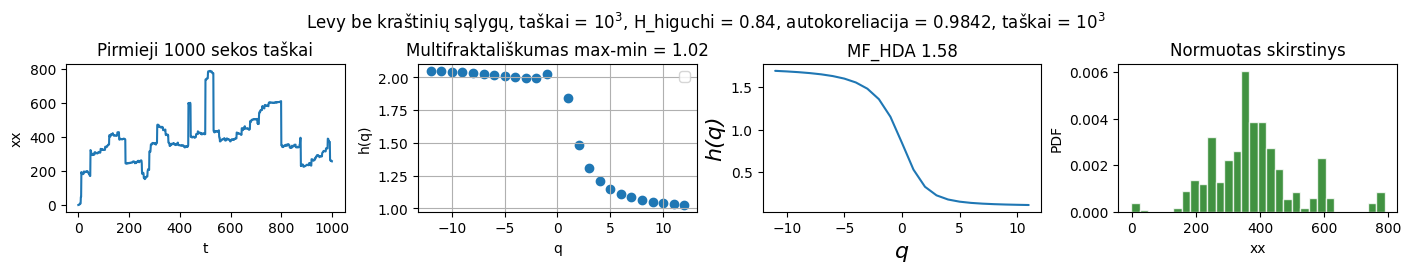

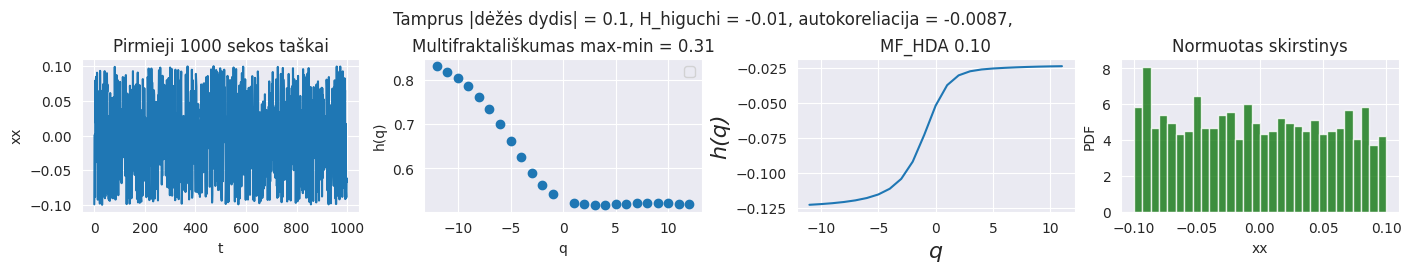

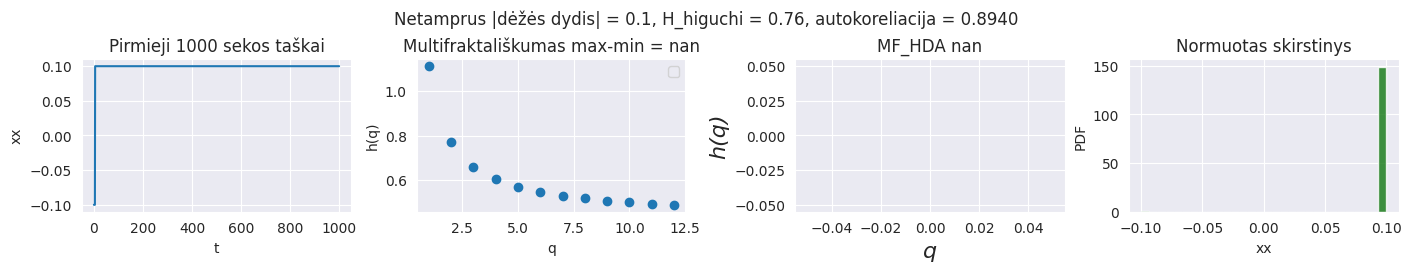

In [ ]:
def levy_multi_mono(H=0.5, box_size = 1, steps = 1000):
    # fBm generavimas

    y = np.random.standard_cauchy(size=steps).cumsum()  # Placeholder for Levy series generation

    # paduodu skirtingom krastinem salygom

    y_tamprus = judesys_dezeje_tamprus(y, box_size=box_size)
    y_netamprus = judesys_dezeje_netamprus(y, box_size=box_size)

    title_free = f'Levy be kraštinių sąlygų, taškai = $10^{round(math.log10(steps))}$, H_higuchi = {2-higuchi1(y):1.2f}, \
autokoreliacija = {autokoreliacija_lag1(y):1.4f}, taškai = $10^{round(math.log10(steps))}$'

    title_tamprus = f'Tamprus |dėžės dydis| = {box_size}, H_higuchi = {2-higuchi1(y_tamprus):1.2f}, \
autokoreliacija = {autokoreliacija_lag1(y_tamprus):1.4f}, '

    title_netamprus = f'Netamprus |dėžės dydis| = {box_size}, H_higuchi = {2-higuchi1(y_netamprus):1.2f}, \
autokoreliacija = {autokoreliacija_lag1(y_netamprus):1.4f}'


    plot_quadrupo(y, title =title_free)
    plot_quadrupo(y_tamprus, title =title_tamprus )
    plot_quadrupo(y_netamprus, title =title_netamprus )




levy_multi_mono(H = 0.75, box_size=0.1, steps = 1000)

100%|██████████| 9/9 [00:00<00:00, 3581.47it/s]
<ipython-input-12-ebdfcf4021bf>:40: RuntimeWarning: divide by zero encountered in log
  H_hat = np.polyfit(np.log(lag)[4:20],np.log(dfa[4:20]),1)[0]


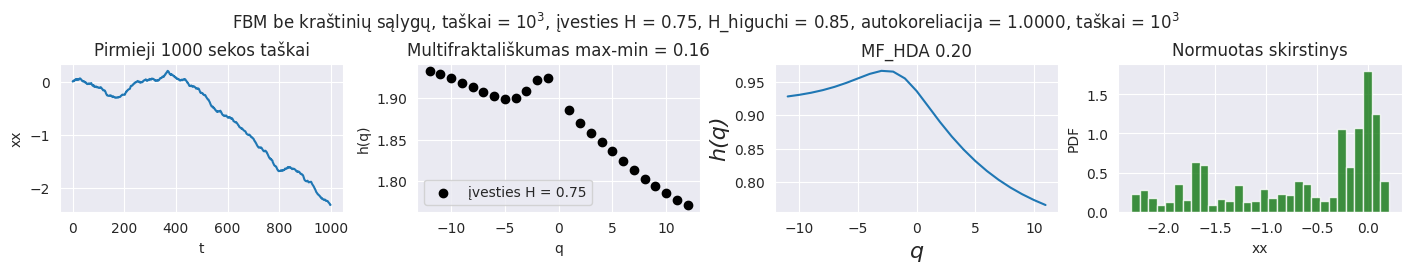

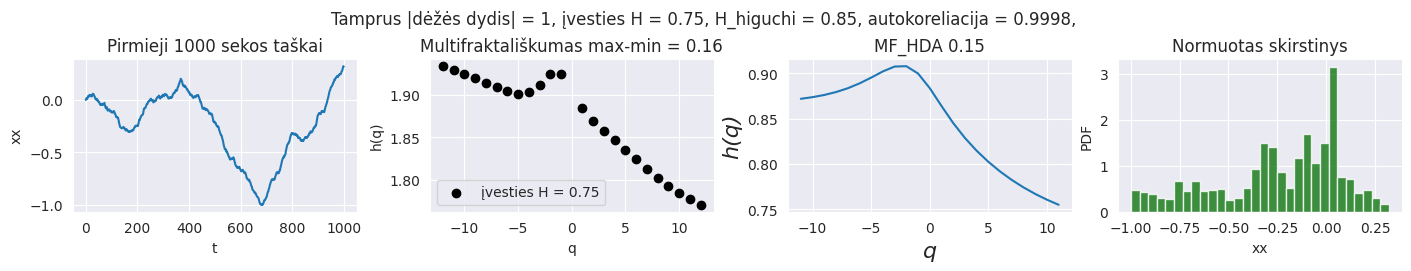

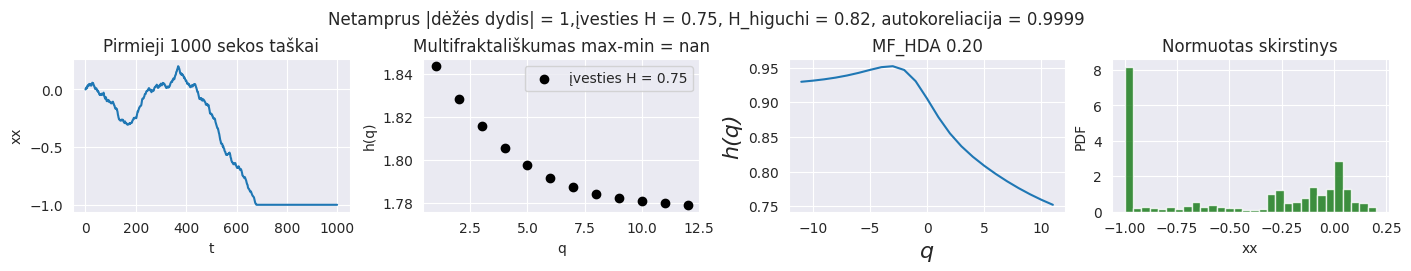

In [ ]:
def fbm_multi_mono(H=0.5, box_size = 1, steps = 10000):
    # fBm generavimas
    f = FBM(n=steps, hurst=H, length=1, method='daviesharte')
    y = f.fbm()[1:]
    # paduodu skirtingom krastinem salygom

    y_tamprus = judesys_dezeje_tamprus(y, box_size=box_size)
    y_netamprus = judesys_dezeje_netamprus(y, box_size=box_size)

    title_free = f'FBM be kraštinių sąlygų, taškai = $10^{round(math.log10(steps))}$, \
įvesties H = {H}, H_higuchi = {2-higuchi1(y):1.2f}, \
autokoreliacija = {autokoreliacija_lag1(y):1.4f}, taškai = $10^{round(math.log10(steps))}$'

    title_tamprus = f'Tamprus |dėžės dydis| = {box_size}, \
įvesties H = {H}, H_higuchi = {2-higuchi1(y_tamprus):1.2f}, \
autokoreliacija = {autokoreliacija_lag1(y_tamprus):1.4f}, '

    title_netamprus = f'Netamprus |dėžės dydis| = {box_size},\
įvesties H = {H}, H_higuchi = {2-higuchi1(y_netamprus):1.2f}, \
autokoreliacija = {autokoreliacija_lag1(y_netamprus):1.4f}'


    plot_quadrupo(y, H, title =title_free)
    plot_quadrupo(y_tamprus,H, title =title_tamprus )
    plot_quadrupo(y_netamprus,H, title =title_netamprus )




fbm_multi_mono(H = 0.75, box_size=1, steps = 1000)

100%|██████████| 9/9 [00:00<00:00, 5987.11it/s]
<ipython-input-12-ebdfcf4021bf>:40: RuntimeWarning: divide by zero encountered in log
  H_hat = np.polyfit(np.log(lag)[4:20],np.log(dfa[4:20]),1)[0]
<ipython-input-8-8569dcb3df4e>:75: RuntimeWarning: invalid value encountered in multiply
  W = (np.diff(BE)); H = np.histogram(Dx, bins = BE, density=True); P = H[0] * W  # calculate the probability of each bin


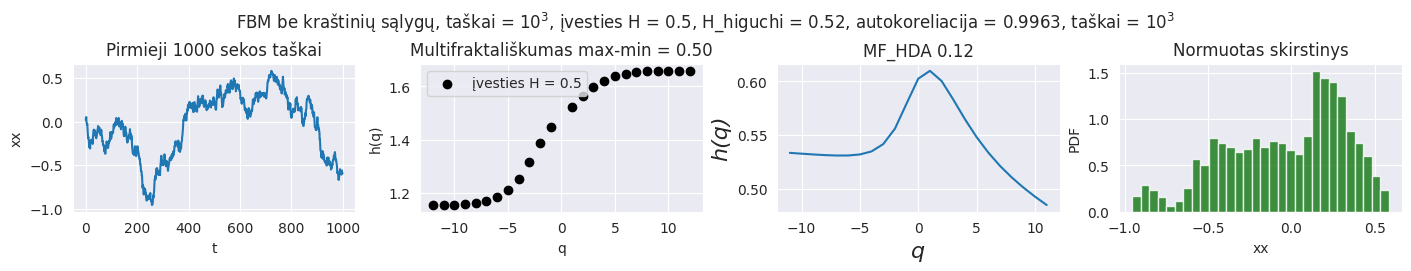

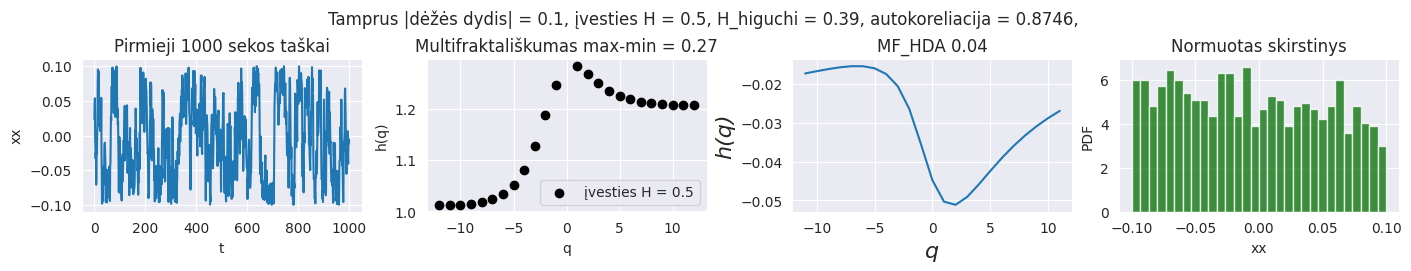

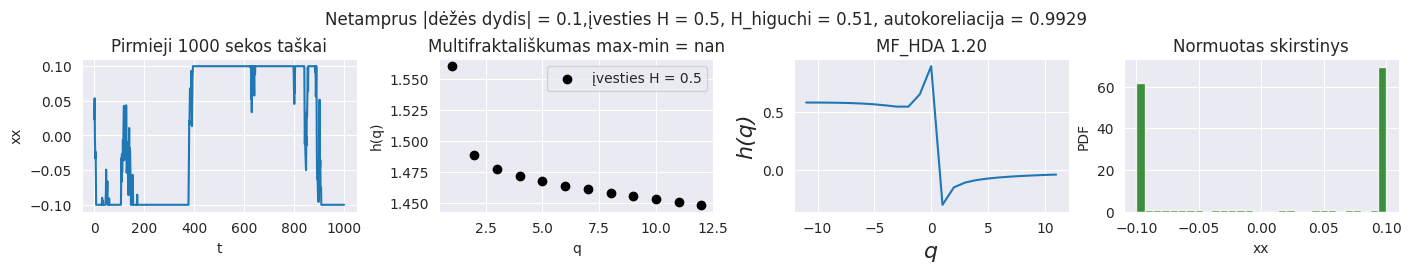

In [ ]:
fbm_multi_mono(H = 0.5, box_size=0.1, steps = 1000)

100%|██████████| 9/9 [00:00<00:00, 2452.33it/s]
<ipython-input-12-ebdfcf4021bf>:40: RuntimeWarning: divide by zero encountered in log
  H_hat = np.polyfit(np.log(lag)[4:20],np.log(dfa[4:20]),1)[0]


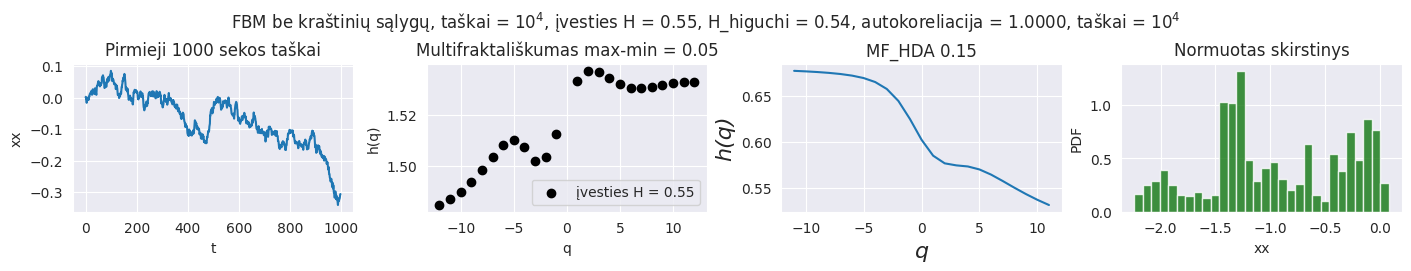

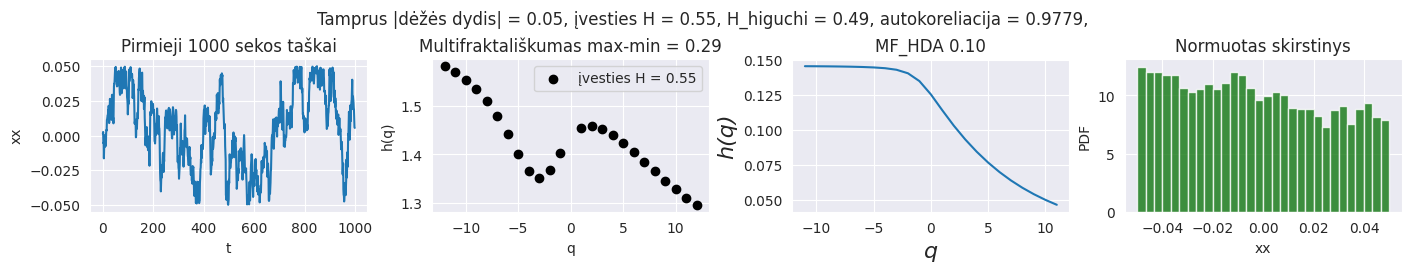

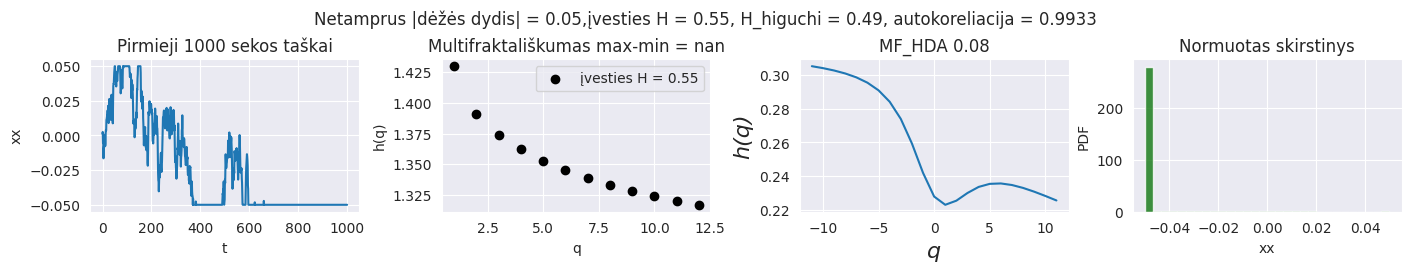

In [ ]:
fbm_multi_mono(H = 0.55, box_size=0.05, steps = 10000)

In [ ]:
#didelis persokimas, nes MFDFA yra biski bllshit ar negaliu higuchi naudoti jiems?
#kaip atrodytu be krastiniu salygu?

#galem plotinti H su krastinem salygom ir H be krastiniu salygu plot padaryt
#ir su skirtingais algoritmais!!!


#pastebejau jog krastines salygos sumazina Hursto eksponentę laiko eilutės.
#Kaip

#tai gerai eksperimentas:


# Oh well

100%|██████████| 9/9 [00:00<00:00, 4896.71it/s]


KeyboardInterrupt: 

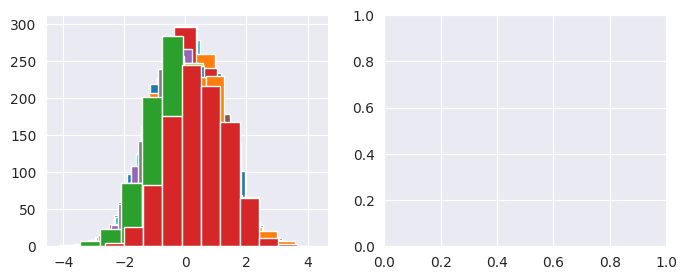

In [ ]:
def myhiguchi(N = 100, hh_set=[0.2,0.5,0.8], box_size = 0.1,plot=True): #Higuchi FD
    if plot ==True:
        fig, (a1, a2) = plt.subplots(1,2, figsize=(8,3))



    hh_free_out = []

    hh_box_out  = []
    hh_box_out2 = []
    hh_box_out3 = []
    #print(f"h_IN : h_OUT")
    maxai = []


    for h in hh_set:

        #f2 = FractionalBrownianMotion(hurst=h, t=N)
        #y = f2.sample(N)[1:]
        f = FBM(n=N, hurst=h, length=N, method='daviesharte')
        y_free = f.fbm()[1:]

        if plot ==True:
            a1.hist(y_free[:-1]-y_free[1:])
        #print('max dydis yra ', max(y_free))
        maxai.append(np.max(y_free[:-1]-y_free[1:]))
        hout = 2-higuchi1(y_free)
        hh_free_out.append(hout)

        y_boxed = judesys_dezeje_tamprus(y_free, box_size=0.1)
        hout = 2-higuchi1(y_boxed)
        hh_box_out.append(hout)

        y_boxed = judesys_dezeje_tamprus(y_free, box_size=0.01)
        hout = 2-higuchi1(y_boxed)
        hh_box_out2.append(hout)

        y_boxed = judesys_dezeje_tamprus(y_free, box_size=0.001)
        hout = 2-higuchi1(y_boxed)
        hh_box_out3.append(hout)

    if plot ==True:
        a2.set_title(f'FBm max šuolis priklausomai nuo Hursto,\n N_realizacijos = {N}, N_H_taškų = {len(hh_set)}', color = 'Blue')
        a2.plot(hh_set, maxai, label='')
        a2.set_xlabel('H įvestis')
        a2.set_ylabel('max(dFBM)')
        a2.legend()
        plt.figure()

    return hh_free_out, hh_box_out, hh_box_out2, hh_box_out3


hh_set = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
hh_set = np.linspace(0,1,30)[1:-1]
box_size = 0.1




hh_free_out, hh_box_out, hh_box_out2, hh_box_out3 = myhiguchi(N = 1000, hh_set=hh_set)
plt.plot(hh_set,hh_set, 'g--')
plt.plot(hh_set, hh_free_out, label = 'nedėžėje', color='green')
plt.plot(hh_set, hh_box_out, label = f'{0.1} dydžio dėžėje', color='blue')
plt.plot(hh_set, hh_box_out2, label = f'{0.01} dydžio dėžėje', color = 'red')
plt.plot(hh_set, hh_box_out3, label =f'{0.001} dydžio dėžėje', color='black')
plt.xlabel(f'$H$ (Įvestis)')
plt.ylabel(f'$H$ (Išvestis)')
plt.legend()

#reikia kazkaip sunormuot! kad toks pat skirstinys butų!
#ir padaryt nuo
#Levy ir MSD

100%|██████████| 9/9 [00:00<00:00, 1584.08it/s]


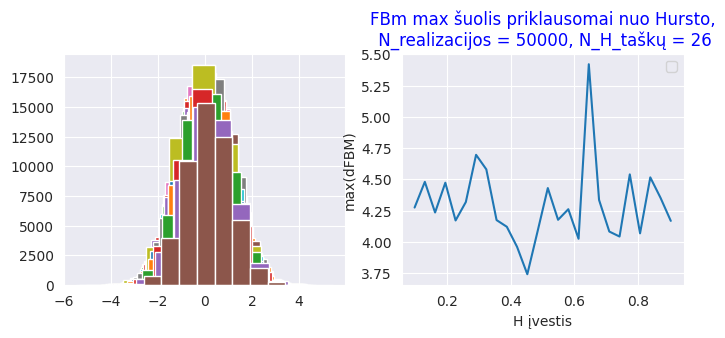

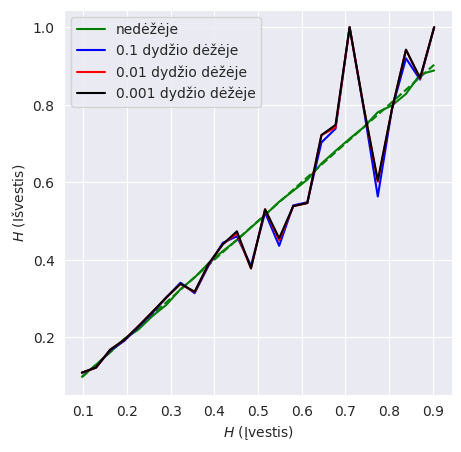

In [ ]:
def myhiguchi(N = 100, hh_set=[0.2,0.5,0.8], box_size = 0.1,plot=True): #Higuchi FD
    if plot ==True:
        fig, (a1, a2) = plt.subplots(1,2, figsize=(8,3))



    hh_free_out = []

    hh_box_out  = []
    hh_box_out2 = []
    hh_box_out3 = []
    #print(f"h_IN : h_OUT")
    maxai = []


    for h in hh_set:

        #f2 = FractionalBrownianMotion(hurst=h, t=N)
        #y = f2.sample(N)[1:]
        f = FBM(n=N, hurst=h, length=N, method='daviesharte')
        y_free = f.fbm()[1:]

        if plot ==True:
            a1.hist(y_free[:-1]-y_free[1:])
        #print('max dydis yra ', max(y_free))
        maxai.append(np.max(y_free[:-1]-y_free[1:]))
        hout = 2-higuchi1(y_free)
        hh_free_out.append(hout)

        y_boxed = judesys_dezeje_netamprus(y_free, box_size=0.1)
        hout = 2-higuchi1(y_boxed)
        hh_box_out.append(hout)

        y_boxed = judesys_dezeje_netamprus(y_free, box_size=0.01)
        hout = 2-higuchi1(y_boxed)
        hh_box_out2.append(hout)

        hout = 2-higuchi1(judesys_dezeje_netamprus(y_free, box_size=0.001))
        hh_box_out3.append(hout)

    if plot ==True:
        a2.set_title(f'FBm max šuolis priklausomai nuo Hursto,\n N_realizacijos = {N}, N_H_taškų = {len(hh_set)}', color = 'Blue')
        a2.plot(hh_set, maxai, label='')
        a2.set_xlabel('H įvestis')
        a2.set_ylabel('max(dFBM)')
        a2.legend()
        plt.figure()

    return hh_free_out, hh_box_out, hh_box_out2, hh_box_out3



hh_set = np.linspace(0,1,32)[3:-3]
box_size = 0.1




hh_free_out, hh_box_out, hh_box_out2, hh_box_out3 = myhiguchi(N = 50000, hh_set=hh_set)
plt.plot(hh_set,hh_set, 'g--')
plt.plot(hh_set, hh_free_out, label = 'nedėžėje', color='green')
plt.plot(hh_set, hh_box_out, label = f'{0.1} dydžio dėžėje', color='blue')
plt.plot(hh_set, hh_box_out2, label = f'{0.01} dydžio dėžėje', color = 'red')
plt.plot(hh_set, hh_box_out3, label =f'{0.001} dydžio dėžėje', color='black')
plt.xlabel(f'$H$ (Įvestis)')
plt.ylabel(f'$H$ (Išvestis)')
plt.legend()

#reikia kazkaip sunormuot! kad toks pat skirstinys butų!
#ir padaryt nuo
#Levy ir MSD

  0%|          | 0/9 [00:00<?, ?it/s]


FloatingPointError: divide by zero encountered in log

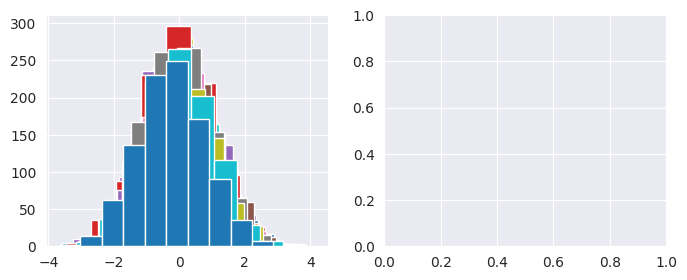

In [ ]:

hh_free_out, hh_box_out, hh_box_out2, hh_box_out3 = myhiguchi(N = 1000, hh_set=hh_set)
plt.plot(hh_set,hh_set, 'g--')
plt.plot(hh_set, hh_free_out, label = 'nedėžėje', color='green')
plt.plot(hh_set, hh_box_out, label = f'{0.1} dydžio dėžėje', color='blue')
plt.scatter(hh_set, hh_box_out2, label = f'{0.01} dydžio dėžėje', color = 'red')
plt.scatter(hh_set, hh_box_out3, label =f'{0.001} dydžio dėžėje', color='black')
plt.xlabel(f'$H$ (Įvestis)')
plt.ylabel(f'$H$ (Išvestis)')
plt.legend()


  0%|          | 0/9 [00:00<?, ?it/s]


FloatingPointError: divide by zero encountered in log

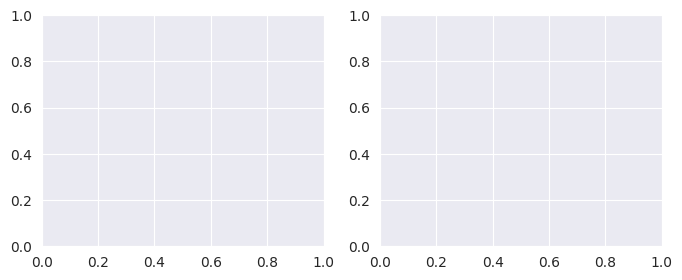

In [ ]:
#hh_set, h_out, label=f'Pearson Correlation = {np.corrcoef(hh_set, h_out)[0][1]:3.6f}


fig, (a1, a2) = plt.subplots(1,2, figsize=(8,3))

hh_set = np.linspace(0,1,40)[1:-1] #generuojam H ivesties be kraštų.

NN = [100,200,300,400,500, 600, 700,800,900,1000,1500,2000,3000,9000]

corr_free=[]
corr_box =[]
corr_box2 =[]
corr_box3 = []
corrs=[]


#nebutina sequence galima vektorizuot/paralerizuot
for N in NN:

    hh_out = myhiguchi(N = N, hh_set=hh_set,plot=False)
    corrs.append(np.corrcoef(hh_set, hh_out)[0][1:])

#a.plot(hh_set,hh_set, 'g--')
#a2.plot(hh_set, hh_free_out, label = 'nedėžėje', color='green')
#.plot(hh_set, hh_box_out, label = f'{0.1} dydžio dėžėje', color='blue')
#plt.plot(hh_set, hh_box_out2, label = f'{0.01} dydžio dėžėje', color = 'red')
#plt.plot(hh_set, hh_box_out3, label =f'{0.001} dydžio dėžėje', color='black')




labels = ['FBM','FBM tampri dėžė diametras = 0.1','FBM tampri dėžė diametras = 0.01','FBM tampri dėžė diametras = 0.001']

for i, koreliacija in enumerate(np.array(corrs).T):
    plt.plot(NN,koreliacija,label=labels[i])


plt.legend()
plt.ylim(0, 1.1)
plt.axhline(y=1, color='Brown', linestyle='--', alpha =0.6)
plt.title('Higuchi')
plt.xlabel('N (realizacijos ilgis)')
plt.ylabel(r'Corr($H_{in}, H_{out}$)')
corrsSITOGRAFIKO = [[ 0.95124774,  0.89947941,  0.13605281, -0.05870631],
 [ 0.98359602,  0.93973102,  0.47799473, -0.22521014],
 [ 0.9907384 ,  0.96332575,  0.5272579 , -0.14930632],
 [ 0.99168844,  0.96428054,  0.66523977, -0.09007303],
 [ 0.99488246,  0.96393841,  0.7078398 , -0.06077488],
 [0.98990922, 0.97592984, 0.72166519, 0.25889026],
 [ 0.9923965 ,  0.97468799,  0.7463918 , -0.0890726 ],
[0.98995708, 0.97439818, 0.77122337, 0.4185326 ],
 [0.9952036 , 0.97719116, 0.77634514, 0.31760649],
 [ 0.99442612,  0.97988229,  0.78739545, -0.08452348],
 [0.99766039, 0.98577938, 0.83096735, 0.36068853],
 [0.99680302, 0.98558008, 0.85762125, 0.31386543],
 [0.99795069, 0.98806796, 0.88010988, 0.54157785],
 [0.99877508, 0.99193292, 0.92409637, 0.68752409]]

NN=[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 3000, 9000]



100%|██████████| 9/9 [00:00<00:00, 2476.46it/s]


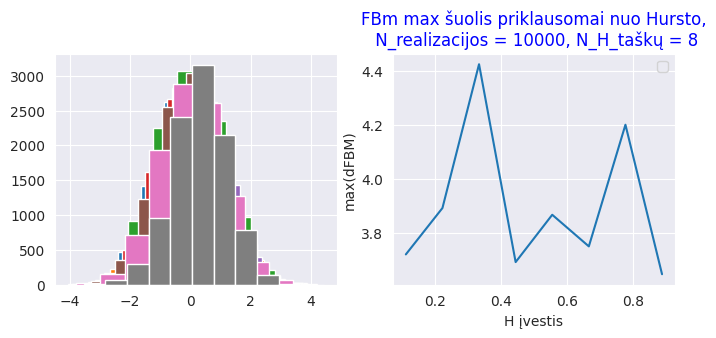

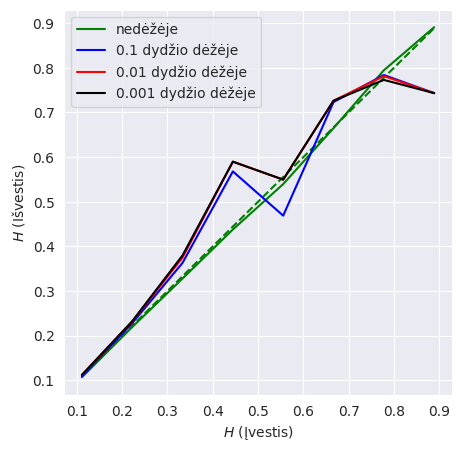

In [ ]:

hh_set = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
hh_set = np.linspace(0,1,10)[1:-1]
box_size = 0.1



#cia taip vyksta nes normavimo nera ir gaunam jog arteja
hh_free_out, hh_box_out, hh_box_out2, hh_box_out3 = myhiguchi(N = 10000, hh_set=hh_set)
plt.plot(hh_set,hh_set, 'g--')
plt.plot(hh_set, hh_free_out, label = 'nedėžėje', color='green')
plt.plot(hh_set, hh_box_out, label = f'{0.1} dydžio dėžėje', color='blue')
plt.plot(hh_set, hh_box_out2, label = f'{0.01} dydžio dėžėje', color = 'red')
plt.plot(hh_set, hh_box_out3, label =f'{0.001} dydžio dėžėje', color='black')
plt.xlabel(f'$H$ (Įvestis)')
plt.ylabel(f'$H$ (Išvestis)')
plt.legend()



100%|██████████| 9/9 [00:00<00:00, 4046.39it/s]
50it [00:00, 76011.31it/s]
100%|██████████| 9/9 [00:00<00:00, 3709.95it/s]
50it [00:00, 64035.18it/s]
100%|██████████| 9/9 [00:00<00:00, 2923.09it/s]
50it [00:00, 54092.13it/s]
100%|██████████| 9/9 [00:00<00:00, 3394.98it/s]
50it [00:00, 50267.31it/s]
100%|██████████| 9/9 [00:00<00:00, 3627.24it/s]
50it [00:00, 71428.88it/s]
100%|██████████| 9/9 [00:00<00:00, 3594.78it/s]
50it [00:00, 82467.64it/s]
100%|██████████| 9/9 [00:00<00:00, 4008.15it/s]


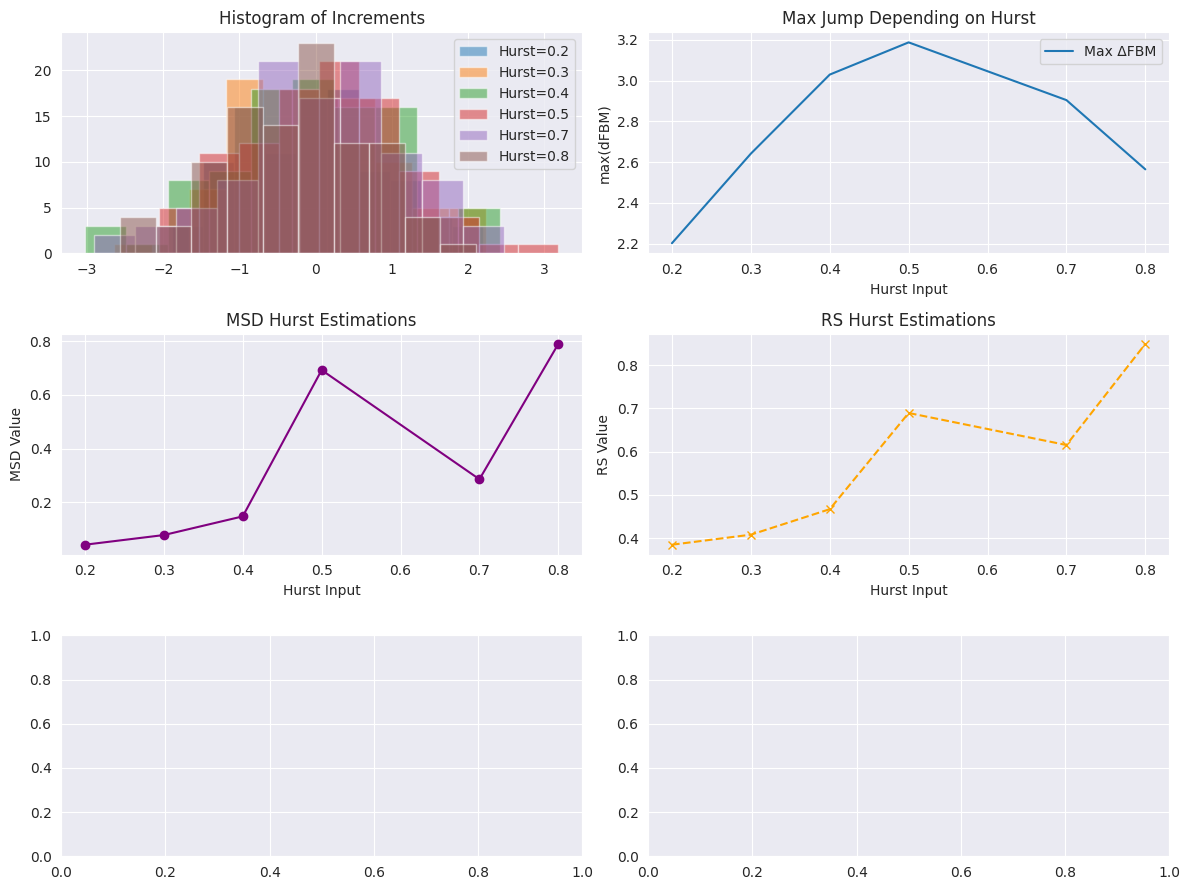

In [ ]:

def myhiguchi(N=100, hh_set=[0.2,0.3,0.4, 0.5,0.7, 0.8], box_sizes=[0.1, 0.01, 0.001], plot=True):
    if plot:
        fig, axs = plt.subplots(3, 2, figsize=(12, 9))  # Adjusting for more plots

    hh_free_out = []
    hh_box_outs = [[] for _ in box_sizes]
    maxai = []
    msd_vals = []
    rs_vals = []

    for h in hh_set:
        f = FBM(n=N, hurst=h, length=N, method='daviesharte')
        y_free = f.fbm()[1:]

        if plot:
            axs[0, 0].hist(y_free[:-1] - y_free[1:], alpha=0.5, label=f'Hurst={h}')

        maxai.append(np.max(np.abs(y_free[:-1] - y_free[1:])))
        hh_free_out.append(2 - higuchi1(y_free))
        msd_vals.append(myMSD(y_free))
        rs_vals.append(myRS(y_free))

        for i, box_size in enumerate(box_sizes):
            y_boxed = judesys_dezeje_netamprus(y_free, box_size=box_size)
            hh_box_outs[i].append(2 - higuchi1(y_boxed))

    if plot:
        axs[0, 0].set_title('Histogram of Increments')
        axs[0, 0].legend()

        axs[0, 1].plot(hh_set, maxai, label='Max ΔFBM')
        axs[0, 1].set_title('Max Jump Depending on Hurst')
        axs[0, 1].set_xlabel('Hurst Input')
        axs[0, 1].set_ylabel('max(dFBM)')
        axs[0, 1].legend()

        axs[1, 0].plot(hh_set, msd_vals, marker='o', linestyle='-', color='purple')
        axs[1, 0].set_title('MSD Hurst Estimations')
        axs[1, 0].set_xlabel('Hurst Input')
        axs[1, 0].set_ylabel('MSD Value')

        axs[1, 1].plot(hh_set, rs_vals, marker='x', linestyle='--', color='orange')
        axs[1, 1].set_title('RS Hurst Estimations')
        axs[1, 1].set_xlabel('Hurst Input')
        axs[1, 1].set_ylabel('RS Value')

        plt.tight_layout()
        plt.show()

    return hh_free_out, hh_box_outs, msd_vals, rs_vals
myhiguchi();

100%|██████████| 9/9 [00:00<00:00, 2812.87it/s]
100it [00:00, 29429.58it/s]
100%|██████████| 9/9 [00:00<00:00, 3640.89it/s]
100it [00:00, 45392.90it/s]
100%|██████████| 9/9 [00:00<00:00, 4929.32it/s]
100it [00:00, 33298.70it/s]
100%|██████████| 9/9 [00:00<00:00, 2675.13it/s]
100it [00:00, 26985.16it/s]
100%|██████████| 9/9 [00:00<00:00, 3157.04it/s]
100it [00:00, 47031.89it/s]
100%|██████████| 9/9 [00:00<00:00, 3520.02it/s]
100it [00:00, 35913.21it/s]
100%|██████████| 9/9 [00:00<00:00, 2999.03it/s]
100it [00:00, 39703.75it/s]
100%|██████████| 9/9 [00:00<00:00, 5175.31it/s]
100it [00:00, 56925.95it/s]
100%|██████████| 9/9 [00:00<00:00, 3873.65it/s]
100it [00:00, 39199.10it/s]
100%|██████████| 9/9 [00:00<00:00, 5398.85it/s]
100it [00:00, 30369.30it/s]
100%|██████████| 9/9 [00:00<00:00, 3901.27it/s]
100it [00:00, 35166.46it/s]
100%|██████████| 9/9 [00:00<00:00, 2892.40it/s]
100it [00:00, 37864.98it/s]
100%|██████████| 9/9 [00:00<00:00, 5084.69it/s]
100it [00:00, 87949.34it/s]
100%|███████

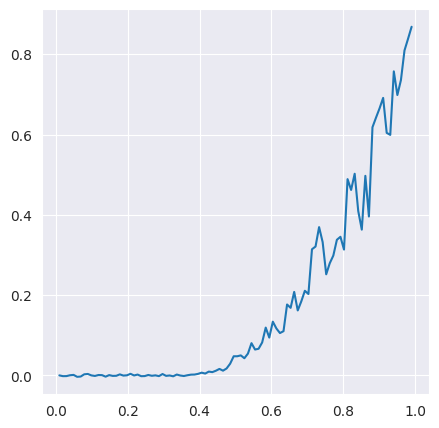

In [ ]:


def calcH(xx):
    return {'2-D_higuchi':2-higuchi1(xx),'H_MSD': myMSD(xx), 'H_RS':myRS(xx)}



def calcTamprusNetamprus(xx, box_size=0.1):
    free = calcH(xx)

    xx_tamprus = judesys_dezeje_tamprus(xx, box_size=box_size)
    tamprus = calcH(xx_tamprus)

    xx_netamprus = judesys_dezeje_netamprus(xx, box_size=box_size)
    netamprus = calcH(xx_netamprus)

    return {'laisvas':free, 'tamprus':tamprus, 'netamprus':netamprus}

hh = np.linspace(0,1, 102)[1:-1]
Data = {}
N = 1000

for h in hh:
    f = FBM(n=N, hurst=h, length=1, method='daviesharte')
    xx = f.fbm()[1:]

    Data[f'fbm h={h:1.2f}']=calcTamprusNetamprus(xx, box_size=0.05)

qq= []
for h in hh:
    qq.append(Data[f'fbm h={h:1.2f}']['tamprus']['H_MSD'])

plt.plot(hh,qq)

In [ ]:
qq= []
for h in hh:
    qq.append(Data[f'fbm h={h:1.2f}']['laisvas']['H_MSD'])

plt.plot(hh,qq)

In [ ]:
#@title levy same thing

hh = np.linspace(0,1, 102)[1:-1]
Data = {}

for h in hh:
    f = FBM(n=1000, hurst=h, length=1, method='daviesharte')
    xx = f.fbm()[1:]

    Data[f'fbm h={h:1.2f}']=calcTamprusNetamprus(xx)

qq= []
for h in hh:
    qq.append(Data[f'fbm h={h:1.2f}']['tamprus']['H_MSD'])

plt.plot(hh,qq)

In [ ]:
# Flatten the dictionary
rows = []
for entry_key, categories in Data.items():
    for category_key, metrics in categories.items():
        row = metrics.copy()
        row['Entry'] = entry_key
        row['Category'] = category_key
        rows.append(row)

# Convert to DataFrame
df = pd.DataFrame(rows)

print(df)

IndexError: index 3 is out of bounds for axis 1 with size 3

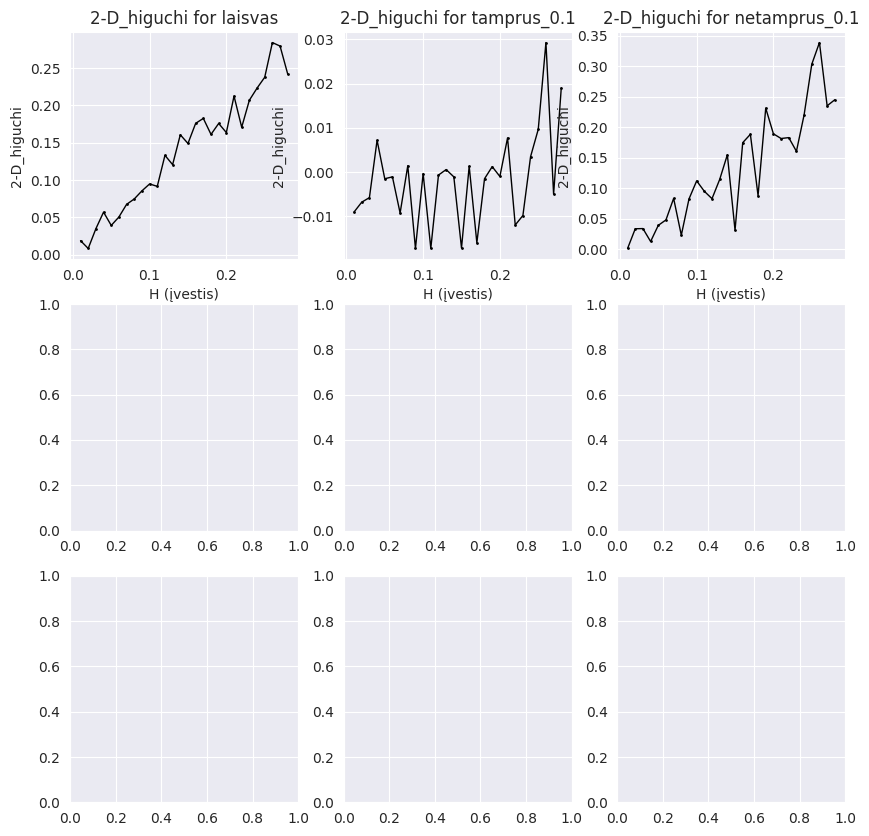

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Plotting
fig, axs = plt.subplots(3, 3, figsize=(10, 10))  # 3x3 grid of plots
metrics = ['2-D_higuchi', 'H_MSD', 'H_RS']
categories = df['Category'].unique()

for i, metric in enumerate(metrics):
    for j, category in enumerate(categories):
        # Create a copy with 'Hurst' column properly added to avoid SettingWithCopyWarning
        filtered_data = df[df['Category'] == category].copy()
        filtered_data['Hurst'] = filtered_data['Entry'].apply(lambda x: float(x.split('=')[1]))

        # Plotting
        axs[i, j].plot(filtered_data['Hurst'], filtered_data[metric], marker='o', linestyle='-', linewidth=1, markersize=1,color='black')
        axs[i, j].set_title(f'{metric} for {category}')
        axs[i, j].set_xlabel('H (įvestis)')
        axs[i, j].set_ylabel(metric)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from fbm import FBM
import matplotlib.pyplot as plt

def calcH(xx):
    return {'2-D_higuchi': 2 - higuchi1(xx), 'H_MSD': myMSD(xx), 'H_RS': myRS(xx)}

def calcTamprusNetamprus(xx, box_sizes=[0.1, 0.05]):
    results = {}
    results['laisvas'] = calcH(xx)
    for box_size in box_sizes:
        xx_tamprus = judesys_dezeje_tamprus(xx, box_size=box_size)
        results[f'tamprus_{box_size}'] = calcH(xx_tamprus)
        xx_netamprus = judesys_dezeje_netamprus(xx, box_size=box_size)
        results[f'netamprus_{box_size}'] = calcH(xx_netamprus)
    return results

# Generate data



aa  = np.linspace(0.1,2, 10)
N =100
Data = {}

for a in aa:
    xx = levy_stable.rvs(alpha=a, beta=1, size=N).cumsum()
    Data[f'levy alpha={a:.2f}'] = calcTamprusNetamprus(xx)

# Flatten the dictionary for DataFrame conversion
rows = []
for entry_key, categories in Data.items():
    for category_key, metrics in categories.items():
        row = metrics.copy()
        row['Entry'] = entry_key
        row['Category'] = category_key
        rows.append(row)

df = pd.DataFrame(rows)


NameError: name 'levy_stable' is not defined

In [ ]:

hh = np.linspace(0,1, 102)[1:-1]
Data = {}


for h in hh:
    #xx = levy_stable.rvs(alpha=a, beta=1, size=N).cumsum()
    f = FBM(n=1000, hurst=h, length=1, method='daviesharte')
    xx = f.fbm()[1:]
    Data[f'fbm H={h:.2f}'] = calcTamprusNetamprus(xx)

# Flatten the dictionary for DataFrame conversion
rows = []
for entry_key, categories in Data.items():
    for category_key, metrics in categories.items():
        row = metrics.copy()
        row['Entry'] = entry_key
        row['Category'] = category_key
        rows.append(row)

df = pd.DataFrame(rows)


In [ ]:
df

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is already loaded
# Extract Alpha from 'Entry'
df['Alpha'] = df['Entry'].apply(lambda x: float(x.split('=')[1]))

# Define metrics and dynamically determine categories
metrics = ['2-D_higuchi', 'H_MSD', 'H_RS']
categories = df['Category'].unique()

# Determine the layout size
n_rows = len(metrics)
n_cols = len(categories) // len(metrics) if len(categories) % len(metrics) == 0 else len(categories)

# Setup the figure and axes for the grid
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axs = np.array(axs).reshape(n_rows, n_cols)  # Ensure axs is always a 2D array for easier indexing

for i, metric in enumerate(metrics):
    for j, category in enumerate(categories):
        # Correct subplot indexing based on current layout
        ax = axs[i, j % n_cols] if n_cols > 1 else axs[i]  # Adjust for single column
        # Filter the DataFrame for the current category and metric
        subset = df[df['Category'] == category].sort_values(by='Alpha')
        # Plotting
        ax.plot(subset['Alpha'], subset[metric], marker='o', linestyle='-', label=category)
        ax.set_title(f'{metric} for {category}')
        ax.set_xlabel('Alpha')
        ax.set_ylabel(metric)
        ax.legend()

plt.tight_layout()
plt.show()




In [ ]:
labels = ['FBM','FBM tampri dėžė diametras = 0.1','FBM tampri dėžė diametras = 0.01','FBM tampri dėžė diametras = 0.001']

for i, koreliacija in enumerate(np.array(corrs).T):
    plt.plot(NN,koreliacija,label=labels[i])


plt.legend()
plt.ylim(0, 1.1)
plt.axhline(y=1, color='Brown', linestyle='--', alpha =0.6)
plt.title('Higuchi')
plt.xlabel('N (realizacijos ilgis)')
plt.ylabel(r'Corr($H_{in}, H_{out}$)')


In [ ]:
labels = ['FBM','FBM tampri dėžė diametras = 0.1','FBM tampri dėžė diametras = 0.01','FBM tampri dėžė diametras = 0.001']

for i, koreliacija in enumerate(np.array(corrs).T):
    plt.plot(NN,koreliacija,label=labels[i])


plt.legend()
plt.ylim(0, 1.1)
plt.axhline(y=1, color='Brown', linestyle='--', alpha =0.6)
plt.title('Higuchi')
plt.xlabel('N (realizacijos ilgis)')
plt.ylabel(r'Corr($H_{in}, H_{out}$)')


In [ ]:

for koreliacija,i in enumerate(np.array(corrs).T):
    print(koreliacija)

In [ ]:
hh_set = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
hh_set = np.linspace(0,1,42)[1:-1]
box_size = 0.1


hh_free_out, hh_box_out, hh_box_out2, hh_box_out3 = myhiguchi(N = 10000, hh_set=hh_set, box_size=box_size)
plt.plot(hh_set,hh_set, 'g--')
plt.plot(hh_set, hh_free_out, label = 'nedėžėje', color='green')
plt.plot(hh_set, hh_box_out, label = f'{0.1} dydžio dėžėje', color='blue')
plt.plot(hh_set, hh_box_out2, label = f'{0.01} dydžio dėžėje', color = 'red')
plt.plot(hh_set, hh_box_out3, label =f'{0.001} dydžio dėžėje', color='black')
plt.xlabel(f'$H$ (Įvestis)')
plt.ylabel(f'$H$ (Išvestis)')
plt.legend()


In [ ]:
def myhiguchi(N = 100, hh_set=[0.2,0.5,0.8], box_size = 0.1): #Higuchi FD

    hh_free_out = []

    hh_box_out  = []
    hh_box_out2 = []
    hh_box_out3 = []
    #print(f"h_IN : h_OUT")
    for h in hh_set:

        #f2 = FractionalBrownianMotion(hurst=h, t=N)
        #y = f2.sample(N)[1:]
        f = FBM(n=N, hurst=h, length=1, method='daviesharte')
        y_free = f.fbm()[1:]
        hout = 2-higuchi1(y_free)
        hh_free_out.append(hout)

        y_boxed = judesys_dezeje_netamprus(y_free, box_size=0.1)
        hout = 2-higuchi1(y_boxed)
        hh_box_out.append(hout)

        y_boxed = judesys_dezeje_netamprus(y_free, box_size=0.01)
        hout = 2-higuchi1(y_boxed)
        hh_box_out2.append(hout)

        y_boxed = judesys_dezeje_netamprus(y_free, box_size=0.001)
        hout = 2-higuchi1(y_boxed)
        hh_box_out3.append(hout)



    return hh_free_out, hh_box_out, hh_box_out2, hh_box_out3


hh_set = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
hh_set = np.linspace(0,1,102)[1:-1]
box_size = 0.1


hh_free_out, hh_box_out, hh_box_out2, hh_box_out3 = myhiguchi(N = 1000, hh_set=hh_set, box_size=box_size)
plt.plot(hh_set,hh_set, 'g--')
plt.plot(hh_set, hh_free_out, label = 'nedėžėje', color='green')
plt.plot(hh_set, hh_box_out, label = f'{0.1} dydžio dėžėje', color='blue')
plt.plot(hh_set, hh_box_out2, label = f'{0.01} dydžio dėžėje', color = 'red')
plt.plot(hh_set, hh_box_out3, label =f'{0.001} dydžio dėžėje', color='black')
plt.xlabel(f'$H$ (Įvestis)')
plt.ylabel(f'$H$ (Išvestis)')
plt.legend()


  0%|          | 0/9 [00:00<?, ?it/s]


FloatingPointError: divide by zero encountered in log

# Higuchi, MSD, tamrpus ir netamprus

In [ ]:


def myGraphs(N = 100, hh_set=[0.2,0.5,0.8], box_size = 0.1,plot=True): #Higuchi FD
    if plot ==True:
        fig, (a1, a2) = plt.subplots(1,2, figsize=(8,3))



    hh_free_out = []

    hh_box_out  = []
    hh_box_out2 = []
    hh_box_out3 = []
    #print(f"h_IN : h_OUT")
    maxai = []


    for h in hh_set:

        #f2 = FractionalBrownianMotion(hurst=h, t=N)
        #y = f2.sample(N)[1:]
        f = FBM(n=N, hurst=h, length=1, method='daviesharte')
        y_free = f.fbm()[1:]

        if plot ==True:
            a1.hist(y_free[:-1]-y_free[1:])

        #print('max dydis yra ', max(y_free))
        maxai.append(np.max(y_free[:-1]-y_free[1:]))
        hout = 2-higuchi1(y_free)
        hh_free_out.append(hout)



        y_boxed = judesys_dezeje_tamprus(y_free, box_size=0.1)
        hout = 2-higuchi1(y_boxed)

        hh_box_out.append(hout)

        y_boxed = judesys_dezeje_tamprus(y_free, box_size=0.01)
        hout = 2-higuchi1(y_boxed)
        hh_box_out2.append(hout)

        y_boxed = judesys_dezeje_tamprus(y_free, box_size=0.001)
        hout = 2-higuchi1(y_boxed)
        hh_box_out3.append(hout)

    if plot ==True:
        a2.set_title(f'FBm max šuolis priklausomai nuo Hursto,\n N_realizacijos = {N}, N_H_taškų = {len(hh_set)}', color = 'Blue')
        a2.plot(hh_set, maxai, label='')
        a2.set_xlabel('H įvestis')
        a2.set_ylabel('max(dFBM)')
        a2.legend()
        plt.figure()

    hh_higuchi = [hh_free_out, hh_box_out, hh_box_out2, hh_box_out3]
    hh_MSD     = []

    return


# Waweletai


In [ ]:
!pip install waipy
import waipy

  Preparing metadata (setup.py) ... done
  Created wheel for waipy: filename=waipy-0.1.51-py3-none-any.whl size=16787 sha256=47db9e8837d079d2b47b881675867795de8d1f624b4e701f6e95e82e5624259d
  Stored in directory: /root/.cache/pip/wheels/ca/c2/4b/a1c339638c96a5a307549fabd1f9558a8fc2d8ef26ea82a9d8
Successfully built waipy


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
!pip install PyWavelets


Lag-1 autocorrelation = 0.01
Nr of Scales: 35
scales [2.0, 2.378414230005442, 2.8284271247461903, 3.363585661014858, 4.0, 4.756828460010884, 5.656854249492381, 6.727171322029716, 8.0, 9.513656920021768, 11.313708498984761, 13.454342644059432, 16.0, 19.027313840043536, 22.627416997969522, 26.908685288118864, 32.0, 38.05462768008707, 45.254833995939045, 53.81737057623773, 64.0, 76.10925536017415, 90.50966799187809, 107.63474115247546, 128.0, 152.2185107203483, 181.01933598375618, 215.2694823049509, 256.0, 304.4370214406966, 362.03867196751236, 430.5389646099018, 512.0, 608.8740428813932, 724.0773439350247, 861.0779292198037]


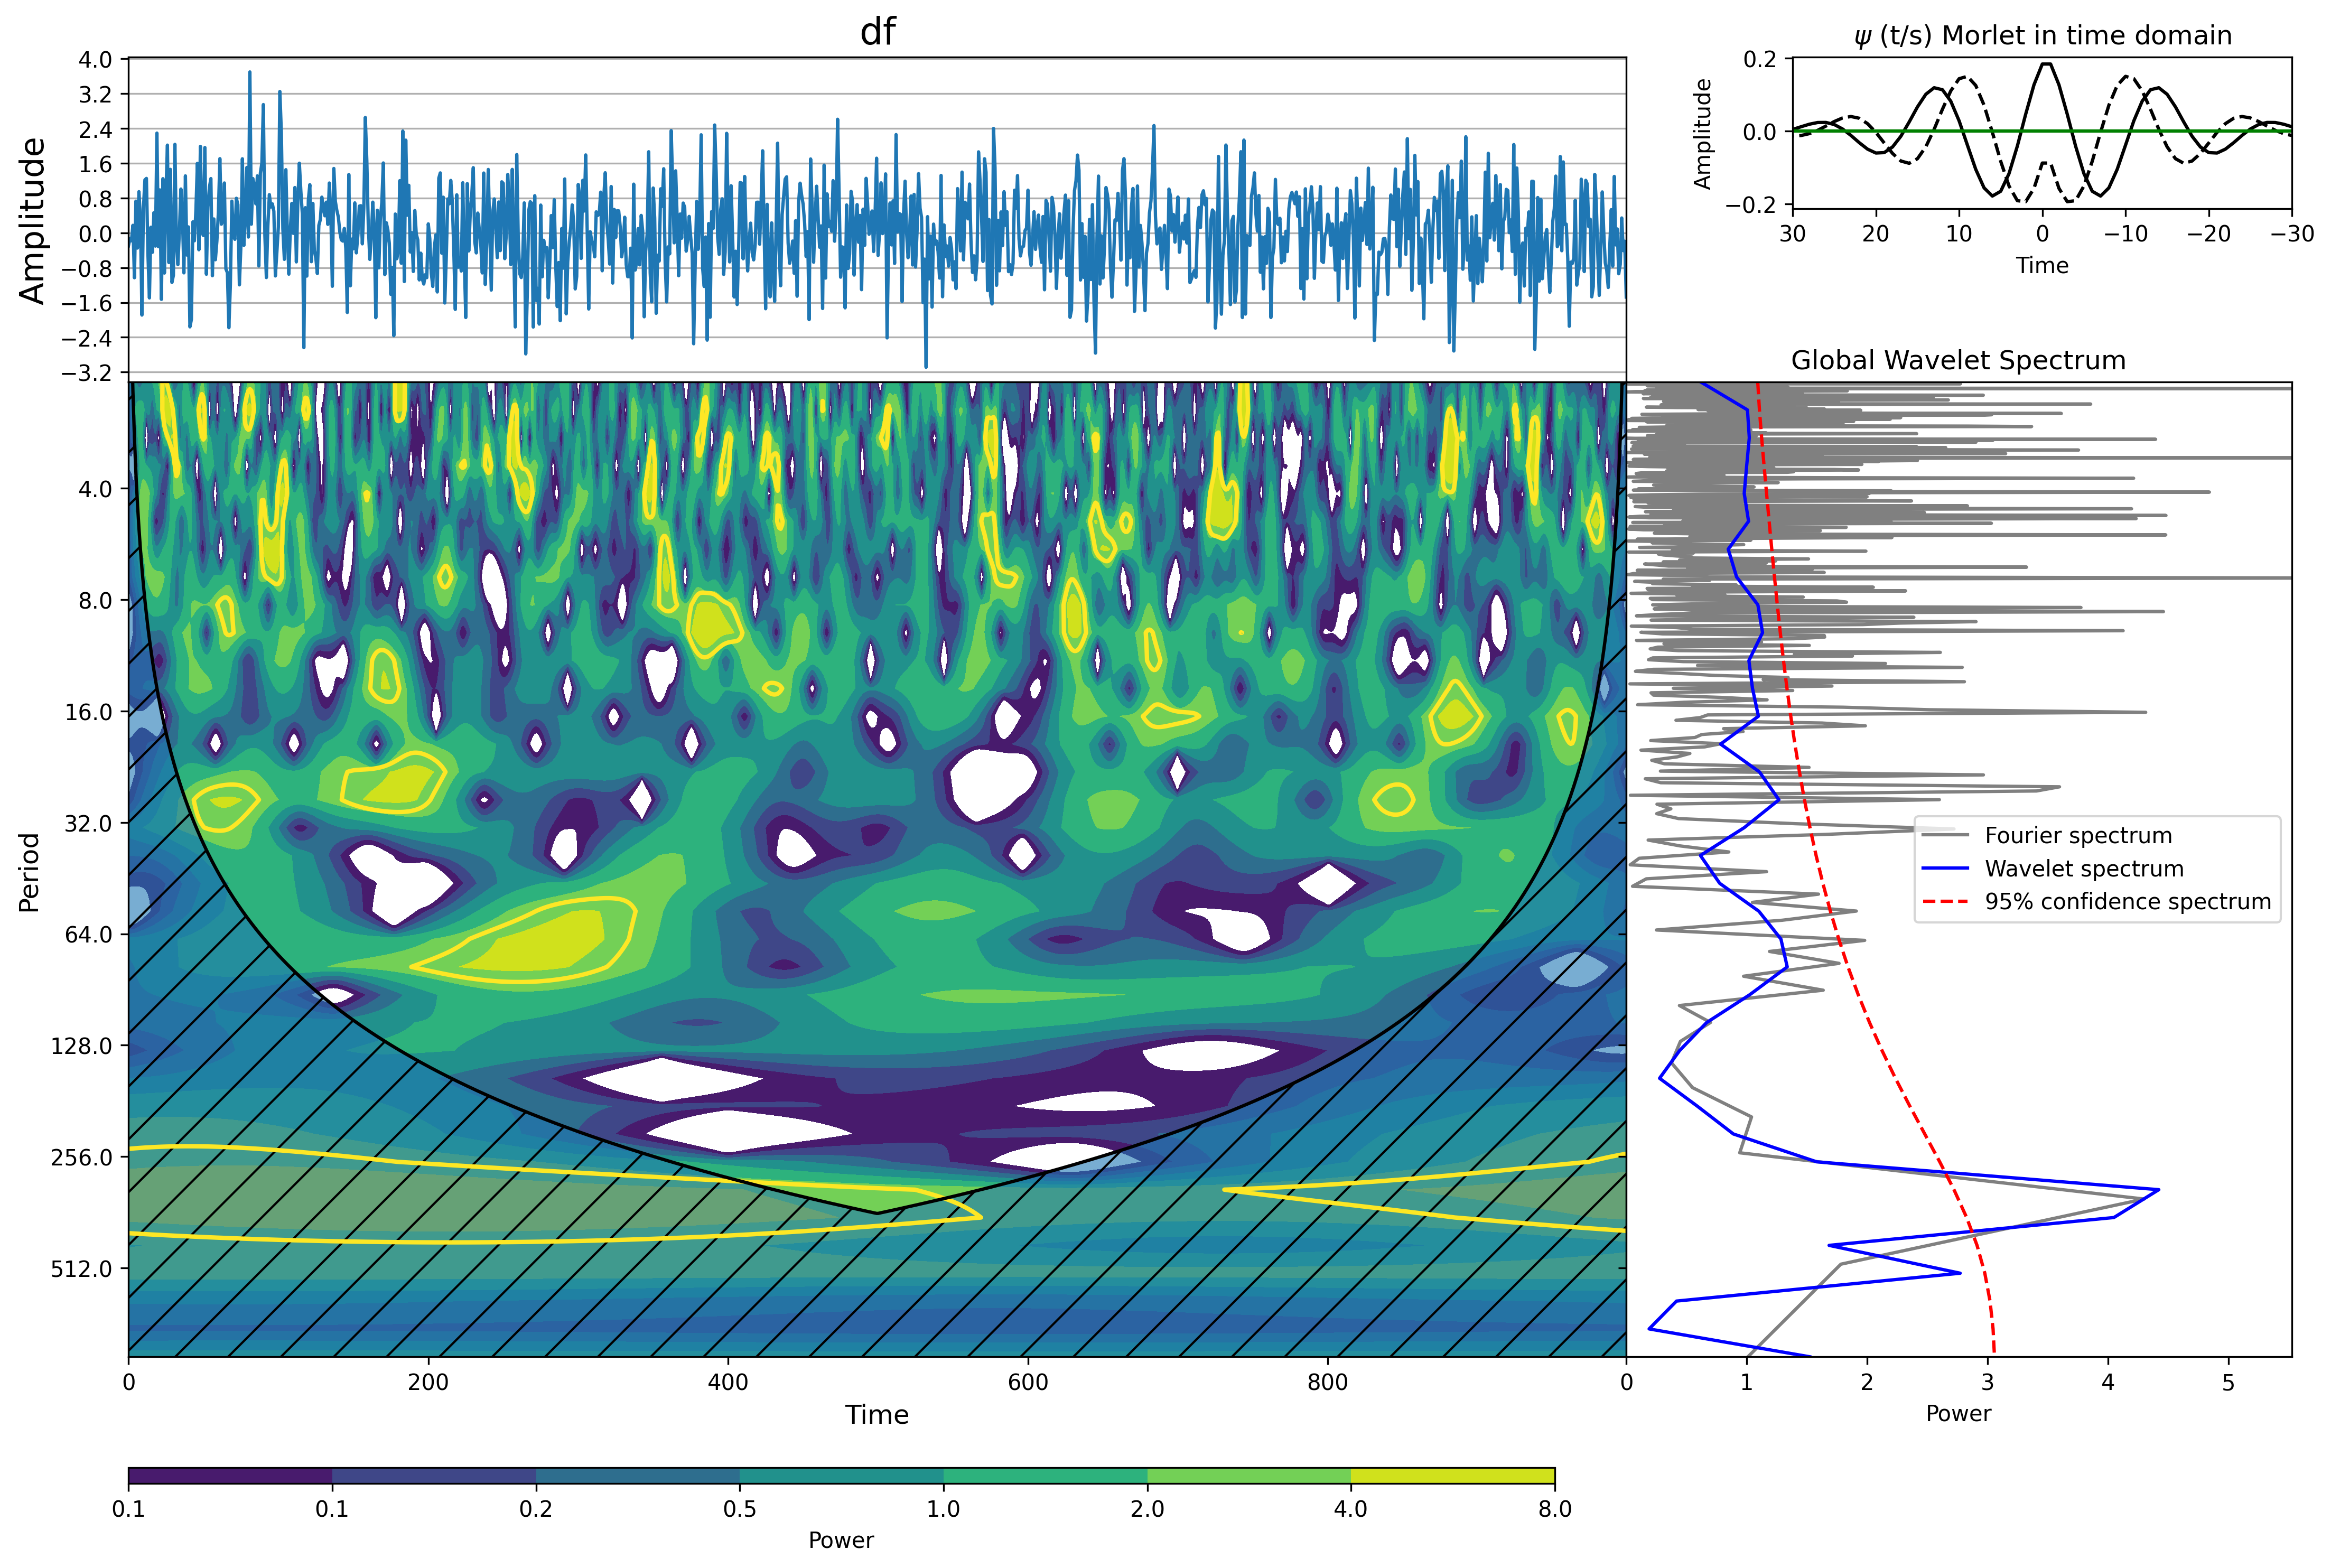

In [ ]:
# Example usage (commented out for now)
noise_data = np.random.normal(0, 0.1, 1000)  # Generating some random noise

# print(result)
data_norm = waipy.normalize(noise_data)
#data_norm = waipy.normalize(data)
label='sdf'
time = np.arange(0, 1000)

alpha = np.corrcoef(data_norm[0:-1], data_norm[1:])[0,1];
print("Lag-1 autocorrelation = {:4.2f}".format(alpha))
result = waipy.cwt(data_norm, 1, 1, 0.25, 2, 4/0.25, alpha, 6, mother='Morlet', name='penis')
waipy.wavelet_plot('df', time, data_norm, 0.03125, result);

# vyneris h(q) palyginimas su kononavicium


In [ ]:

def closeup(xx, H=None, title = None):
    #plotinimas ir multifraktališkumo paskaičiavimas
    fig, ax = plt.subplots(1,4, figsize=(18,4),layout='constrained')

    if title != None:
        fig.suptitle(title) #f'įvesties H = {H}, |dėžės dydis| = {box_size}, taškai = $10^{round(math.log10(steps))}$, tamprus = {tamprus}', fontsize=14, color = 'Green')



    #first plot, the data itself
    rodyk = 1000
    ax[0].plot(xx[:rodyk])
    ax[0].set_xlabel('t')
    ax[0].set_ylabel('xx')
    ax[0].set_title(f'Pirmieji {rodyk} sekos taškai')

    #calculate and plot multifractality second plot
    # Select a band of lags, which usually ranges from
    # very small segments of data, to very long ones, as
    lag = np.unique(np.logspace(0.5, 3, 100).astype(int))
    # Notice these must be ints, since these will segment
    # the data into chucks of lag size

    # The order of the polynomial fitting
    order = 1
    #qq = [-7,-6,-5,-4,-3,-2,-1,-0.3,0.5,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
    qq = np.linspace(-7,7,50)
    qq[qq!=0]

    Hq = []
    for q in qq:
        # Obtain the (MF)DFA as
        lag, dfa = MFDFA(xx, lag = lag, q = q, order = order)
        # To uncover the Hurst index, lets get some log-log plots
        #plt.loglog(lag, dfa, '-', label='fOU: MFDFA q=2')

        # And now we need to fit the line to find the slope. Don't
        # forget that since you are plotting in a double logarithmic
        # scales, you need to fit the logs of the results
        H_hat = np.polyfit(np.log(lag)[4:20],np.log(dfa[4:20]),1)[0]
        Hq.append(H_hat)
        # Now what you should obtain is: slope = H + 1
        #print('Estimated H = '+'{:.3f}'.format(H_hat[0]))

    kiekPlotint = Hq.copy()
    kiekPlotint.append(0)
    kiekPlotint.append(1)
    ax[1].set_title('Multifraktališkumas')
    ax[1].set_xlabel("q")
    ax[1].set_ylim(1.4,1.6)
    ax[1].set_ylabel("h(q)")
    if H != None:
        ax[1].plot(qq, Hq, label= f"įvesties H = {H}", color = 'black')
    else:
        ax[1].plot(qq, Hq)

    ax[1].grid(True)
    ax[1].legend()


    #plot normuota histogramą
    plot_normhist(xx, ax = ax[2], bins = 30)
    ax[2].set_title(f"Normuotas skirstinys")

    #plot log log histogramą
    plot_loghist(xx, ax = ax[3], bins = 10, neigiami = True)
    ax[3].set_title('log-log skirstinys')

In [ ]:
def generate_wiener_process(N=10000):
    """
    Generate a Wiener process (Brownian motion) of length N.

    Parameters:
    - N : int
        The number of steps in the Wiener process.

    Returns:
    - W : numpy.ndarray
        The generated Wiener process.
    """
    # Generate random steps
    steps = np.random.normal(loc=0, scale=np.sqrt(1/N), size=N)
    # Compute the cumulative sum to get the Wiener process
    W = np.cumsum(steps)
    return W

N = 100000
xx = generate_wiener_process(N)

closeup(xx, H=0.5)

In [ ]:
f = FBM(n=N, hurst=0.5, length=1, method='daviesharte')
y_free = f.fbm()[1:]

closeup(y_free, H=0.5)


In [ ]:

box_size = 0.1
f = FBM(n=1000, hurst=0.6, length=1, method='daviesharte')
y = f.fbm()[1:]
# paduodu skirtingom krastinem salygom

#y_tamprus = judesys_dezeje_tamprus(y, box_size=box_size)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
y_netamprus = judesys_dezeje_netamprus(y, box_size=box_size)
ax1.plot(y_netamprus, color='black')

# Levy


In [ ]:
from scipy.stats import levy_stable
#hurst_std, fit_std = standard_hurst(y_free)

In [ ]:
fig, [ax1,ax2,ax3] = plt.subplots(1,3, figsize=(12,3), sharey = True)


N = 1000000


def FBM_hurst(ax1, beta=-1):
    hh_higuchi =[]
    hh_msd =[]
    hh_RS = []

    hh  = np.linspace(0,1, 500)[2:-2]
    for h in hh:
        #xx = levy_stable.rvs(alpha=a, beta=beta, size=N).cumsum()

        f = FBM(n=10000, hurst=h, length=1, method='daviesharte')
        xx = f.fbm()[1:]

        hh_higuchi.append(2-higuchi1(xx))
        hh_msd.append(myMSD(xx))
        hh_RS.append(myRS(xx))

    ax1.set_title(r'FBM')

    ax1.scatter(hh,hh_msd, label = 'MSD', color='blue', alpha = 0.7, s = 5)
    ax1.scatter(hh,hh_RS, label = 'R/S', color='red', alpha = 0.7, s = 5)
    ax1.plot(hh,hh_higuchi, label=r'$2-D_{higuchi}$', color='black')
    ax1.set_xlabel(r'H (įvestis)')
    ax1.set_ylabel(r'H (išvestis)')
    ax1.legend()


#for ax in [ax1,ax2,ax3]:
#FBM_hurst(ax1)

In [ ]:
fig, [ax1,ax2,ax3] = plt.subplots(1,3, figsize=(10,2.5), sharey = True)


N = 100000


def Levy_hurst(ax1, beta=-1):
    hh_higuchi =[]
    hh_msd =[]
    hh_RS = []
    aa  = np.linspace(0.1,2, 500)
    for a in aa:
        xx = levy_stable.rvs(alpha=a, beta=beta, size=N).cumsum()
        hh_higuchi.append(2-higuchi1(xx))
        hh_msd.append(myMSD(xx))
        hh_RS.append(myRS(xx))

    ax1.set_title(r'levy $\beta =$'+f'{beta}')
    ax1.plot(aa,hh_higuchi, label=r'$2-D_{higuchi}$', color='black')
    ax1.scatter(aa,hh_msd, label = 'MSD', color='blue', s = 4)
    ax1.scatter(aa,hh_RS, label = 'R/S', color='red', alpha = 0.7, s = 4)
    ax1.set_xlabel(r'$\alpha$')
    ax1.set_ylabel(r'H (išvestis)')
    ax1.legend()



for beta,ax in zip([0,1], [ax1,ax2]):
    Levy_hurst(ax, beta= beta)
FBM_hurst(ax3)

In [ ]:
fig, [ax1,ax2] = plt.subplots(1,2, figsize=(7,3),sharey=True)


xx = levy_stable.rvs(alpha=1.1, beta=0, size=1000).cumsum()
xx = (xx/np.sum(xx))*1000
ax1.plot(xx)
ax1.set_title('levy skrydis ')
ax1.set_xlabel('t')
ax2.set_xlabel('t')
ax1.set_xlabel('x')
f = FBM(n=1000, hurst=0.5, length=1, method='daviesharte')
x = f.fbm()[1:]
x = (x/np.sum(x))*1000
ax2.plot(x)
ax2.set_title('Brauno procesas')


# New Section

NameError: name 'higuchi1' is not defined

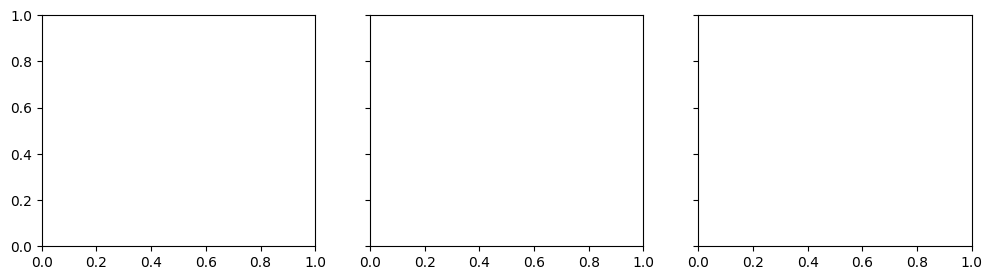

In [ ]:
fig, [ax1,ax2,ax3] = plt.subplots(1,3, figsize=(12,3), sharey = True)


N = 100000

hh =[]
aa  = np.linspace(0.1,2, 100)
for a in aa:
    xx = levy_stable.rvs(alpha=a, beta=-1/5, size=N).cumsum()
    hh.append(2-higuchi1(xx))

ax1.set_title(r'levy $\beta = -1$')
ax1.scatter(aa,hh)
ax1.set_xlabel(r'$\alpha$')
ax1.set_ylabel(r'H (Higuchi)')



In [ ]:
f = FBM(n=1000, hurst=0.7, length=1, method='daviesharte')
y_free = f.fbm()[1:]

MF_HDA(xx)


NameError: name 'FBM' is not defined

In [ ]:
f = FBM(n = 1000, length = 1, hurst = 0.9)

calculate_hurst_msd(f.fbm()) #lovely works!!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate positive Brownian motion
np.random.seed(2314)  # For reproducibility
n = 100000  # Number of steps
dt = 0.1  # Time step
#x_increments = (np.random.normal(0, np.sqrt(dt), n))  # Absolute for positive values
#y_increments = (np.random.normal(0, np.sqrt(dt), n))  # Absolute for positive values

# Compute the cumulative sum to get the Brownian motion and prepend zero
#x = np.insert(np.cumsum(x_increments), 0, 0)
#y = np.insert(np.cumsum(y_increments), 0, 0)

f = FBM(n=n, hurst=0.3, length=1, method='daviesharte')
x = f.fbm()[1:]

f = FBM(n=n, hurst=0.6, length=1, method='daviesharte')
y = f.fbm()[1:]




t = np.linspace(0, n * dt, n + 1)  # Adjust for the additional starting point

# Set up the plots
fig, (ax3,ax1,ax2) = plt.subplots(1,3,figsize=(15, 5), sharey=True)

# Top left - Rotated y(t)
ax1.plot(y, 'g-',linewidth=0.5)  # Reversing time for right-to-left
ax1.set_xlabel('t',fontsize=16, fontstyle='italic')
ax1.set_ylabel('y(t)',fontsize=16, fontstyle='italic')
ax1.set_title('H = 0.6',fontsize=16, fontstyle='italic')

# Top right - Combined motion y(x)
ax2.plot(x, y, 'r--', marker='o',markersize=1,alpha = 0.01, color='black')
ax2.set_xlabel('x(t)',fontsize=16, fontstyle='italic')
ax2.set_ylabel('y(t)',fontsize=16, fontstyle='italic')
ax2.set_title('Kombinacija ',fontsize=16)

# Bottom right - x(t)
ax3.plot(x, 'b-',linewidth=0.3)
ax3.set_xlabel('t',fontsize=16, fontstyle='italic')
ax3.set_ylabel('x(t)',fontsize=16, fontstyle='italic')
ax3.set_title('H = 0.3',fontsize=16, fontstyle='italic')
ax3.invert_xaxis()

plt.tight_layout()
plt.show()
x_old = x
y_old = y

In [ ]:
x1 = judesys_dezeje_netamprus(x_old,box_size=0.1)

y1 = judesys_dezeje_netamprus(y_old,box_size=0.1)



t = np.linspace(0, n * dt, n + 1)  # Adjust for the additional starting point

# Set up the plots
fig, (ax3,ax1,ax2)= plt.subplots(1,3,figsize=(15, 5), sharey=True)

# Top left - Rotated y(t)
ax1.plot(y1, 'g-',linewidth=0.5)  # Reversing time for right-to-left
ax1.set_xlabel('t',fontsize=16, fontstyle='italic')
ax1.set_ylabel('y(t)',fontsize=16, fontstyle='italic')
ax1.set_title('H = 0.6',fontsize=16, fontstyle='italic')


# Top right - Combined motion y(x)
ax2.plot(x1, y1, '-', marker='o',markersize=1,alpha = 0.2, color='black')
ax2.set_xlabel('x(t)',fontsize=16, fontstyle='italic')
ax2.set_ylabel('y(t)',fontsize=16, fontstyle='italic')
ax2.set_title('Kombinacija ',fontsize=16)

# Bottom right - x(t)
ax3.plot(x1, 'b-',linewidth=0.3)
ax3.set_xlabel('t',fontsize=16, fontstyle='italic')
ax3.set_ylabel('x(t)',fontsize=16, fontstyle='italic')
ax3.set_title('H = 0.3',fontsize=16, fontstyle='italic')
ax3.invert_xaxis()


plt.tight_layout()
plt.show()


In [ ]:
x2 = judesys_dezeje_tamprus(x_old,box_size=0.1)

y2 = judesys_dezeje_tamprus(y_old,box_size=0.1)



t = np.linspace(0, n * dt, n + 1)  # Adjust for the additional starting point

# Set up the plots
fig, (ax3,ax1,ax2) = plt.subplots(1,3,figsize=(15, 5), sharey=True)

# Top left - Rotated y(t)
ax1.plot(y2, 'g-',linewidth=0.5)  # Reversing time for right-to-left
ax1.set_xlabel('t',fontsize=16, fontstyle='italic')
ax1.set_ylabel('y(t)',fontsize=16, fontstyle='italic')
ax1.set_title('H = 0.6',fontsize=16, fontstyle='italic')


# Top right - Combined motion y(x)
ax2.plot(x2, y2, 'r--', marker='o',markersize=1,alpha = 0.2, color='black')
ax2.set_xlabel('x(t)',fontsize=16, fontstyle='italic')
ax2.set_ylabel('y(t)',fontsize=16, fontstyle='italic')
ax2.set_title('Kombinacija ',fontsize=16)

# Bottom right - x(t)
ax3.plot(x2, 'b-',linewidth=0.3)
ax3.set_xlabel('t',fontsize=16, fontstyle='italic')
ax3.set_ylabel('x(t)',fontsize=16, fontstyle='italic')
ax3.set_title('H = 0.3',fontsize=16, fontstyle='italic')
ax3.invert_xaxis()

plt.tight_layout()
plt.show()


In [ ]:

len(x),len(y)

# Tamprus, Netampus, Levy

# Tamprus, Netampus, FBM